In [1]:
# 📌 MÉTADONNÉES DU PROJET STA211 - Version Universelle

import sys
import os
import json
import uuid
from pathlib import Path
from datetime import datetime
from IPython.display import display, Markdown

# ============================================================================
# DÉTECTION D'ENVIRONNEMENT
# ============================================================================

def detect_environment():
    """Détecte si on est en local ou sur Colab"""
    if 'google.colab' in sys.modules:
        from google.colab import drive
        drive.mount('/content/drive')
        base_path = Path("/content/drive/MyDrive")
        print("🖥️ Environnement détecté : Google Colab")
    else:
        base_path = Path.cwd()
        print("💻 Environnement détecté : Exécution locale")

    base_path.mkdir(parents=True, exist_ok=True)

    return base_path

# ============================================================================
# CLASSE METADONNEES (version universelle)
# ============================================================================

class ProjectMetadata:
    """Gère les métadonnées dans tous les environnements"""

    def __init__(self, base_path: Path):
        self.base_path = base_path
        self.config_dir = base_path / "config"
        self.config_dir.mkdir(exist_ok=True)

        # Identifiants uniques
        self.session_id = str(uuid.uuid4())[:8]
        self.version = self._manage_version()

        # Configuration
        self.metadata = {
            "environment": "Colab" if 'google.colab' in sys.modules else "Local",
            "project_info": self._get_project_info(),
            "paths": {
                "project_root": str(self.base_path),
                "config_dir": str(self.config_dir)
            }
        }

    def _manage_version(self) -> str:
        """Gère le versioning automatique"""
        version_file = self.config_dir / "version.json"

        if version_file.exists():
            with open(version_file, "r") as f:
                version_data = json.load(f)
                new_version = f"{float(version_data.get('version', 1.0)) + 0.1:.1f}"
        else:
            new_version = "1.0"

        with open(version_file, "w") as f:
            json.dump({"version": new_version}, f)

        return new_version

    def _get_project_info(self) -> dict:
        """Retourne les infos de base du projet"""
        return {
            "name": "STA211: Internet Advertisements Classification",
            "author": "Abdoullatuf",
            "version": self.version,
            "session_id": self.session_id,
            "date": datetime.now().strftime("%Y-%m-%d %H:%M"),
            "random_state": 42,
            "test_size": 0.2,
            "scoring": "f1",
            "cv_folds": 5
        }

    def save(self) -> Path:
        """Sauvegarde les métadonnées"""
        filename = f"metadata_v{self.version}_{self.session_id}.json"
        save_path = self.config_dir / filename

        with open(save_path, "w") as f:
            json.dump(self.metadata, f, indent=4)

        return save_path

    def display(self):
        """Affiche les métadonnées formatées"""
        env_icon = "🖥️" if self.metadata["environment"] == "Colab" else "💻"

        md = f"""
## {env_icon} PROJET STA211 - v{self.version}
**Environnement**: {self.metadata["environment"]}
**Session**: `{self.metadata['project_info']['session_id']}`
**Dernière exécution**: {self.metadata['project_info']['date']}

### 📌 Configuration
- **Auteur**: {self.metadata['project_info']['author']}
- **Random State**: {self.metadata['project_info']['random_state']}
- **Scoring**: {self.metadata['project_info']['scoring']}

### 📁 Chemins
- **Dossier projet**: `{self.metadata['paths']['project_root']}`
- **Dossier config**: `{self.metadata['paths']['config_dir']}`
        """
        display(Markdown(md))

# ============================================================================
# EXÉCUTION PRINCIPALE
# ============================================================================

if __name__ == "__main__":
    try:
        print("🔍 Détection de l'environnement...")
        base_path = detect_environment()

        print("\n🔄 Initialisation des métadonnées...")
        meta = ProjectMetadata(base_path)

        print("\n📊 Affichage des informations...")
        meta.display()

        print("\n💾 Sauvegarde des métadonnées...")
        saved_path = meta.save()
        print(f"✅ Fichier sauvegardé avec succès :\n{saved_path}")

    except Exception as e:
        print(f"\n❌ Erreur : {str(e)}")
        print("Solutions possibles :")
        print("1. Sur Colab : Vérifiez la connexion à Google Drive")
        print("2. En local : Assurez-vous d'avoir les droits d'écriture")
        print(f"3. Créez manuellement le dossier : {base_path/'config'}")

🔍 Détection de l'environnement...
💻 Environnement détecté : Exécution locale

🔄 Initialisation des métadonnées...

📊 Affichage des informations...



## 💻 PROJET STA211 - v1.6
**Environnement**: Local
**Session**: `92c3226d`
**Dernière exécution**: 2025-08-14 14:27

### 📌 Configuration
- **Auteur**: Abdoullatuf
- **Random State**: 42
- **Scoring**: f1

### 📁 Chemins
- **Dossier projet**: `c:\sta211-project\notebooks`
- **Dossier config**: `c:\sta211-project\notebooks\config`
        


💾 Sauvegarde des métadonnées...
✅ Fichier sauvegardé avec succès :
c:\sta211-project\notebooks\config\metadata_v1.6_92c3226d.json


<h2>📑 Table des matières</h2>

<ul>
    <li><a href="#introduction">1. Introduction</a></li>
    <li><a href="#configuration-environnement">2. Configuration de l'environnement</a>
        <ul>
            <li>2.1 Paramètres et Imports</li>
            <li>2.2 Chargement des modules et chemins</li>
        </ul>
    </li>
    <li><a href="#chargement-donnees">3. Chargement et aperçu des données</a>
        <ul>
            <li>3.1 Chargement des jeux de données bruts</li>
            <li>3.2 Inspection des colonnes et types</li>
            <li>3.3 Distribution de la variable cible</li>
        </ul>
    </li>
    <li><a href="#eda">4. Analyse exploratoire (EDA)</a>
        <ul>
            <li>4.1 Analyse des valeurs manquantes</li>
            <li>4.2 Analyse statistique des variables quantitatives</li>
            <li>4.3 Visualisation des distributions et des boxplots</li>
            <li>4.4 Distribution des variables binaires</li>
            <li>4.5 Analyse des corrélations combinées</li>
            <li>4.6 Visualisations globales de l'EDA</li>
            <li>4.7 Synthèse des résultats de l'EDA</li>
        </ul>
    </li>
    <li><a href="#pretraitement">5. Prétraitement avancé</a>
        <ul>
            <li>5.1 Imputation multivariée (MICE)</li>
            <li>5.2 Imputation par KNN</li>
        </ul>
    </li>
    <li><a href="#pretraitement-avance">6. Prétraitement avancé</a>
        <ul>
            <li>6.1 Transformation optimale mixte</li>
            <li>6.2 Traitement des Outliers (Capping)</li>
            <li>6.3 Détection et traitement des variables collinéaires</li>
            <li>6.4 Suppression des variables collinéaires</li>
            <li>6.5 Ingénierie de caractéristiques (Feature Engineering)</li>
        </ul>
    </li>
    <li><a href="#conclusion-pretraitement">7. Conclusion du prétraitement</a></li>
</ul>


# 2. Configuration de l'environnement <a id="configuration-environnement"></a>


## 2.1 Paramètres et Imports

In [2]:
# ============================================================================
# 2.1 PARAMÈTRES ET IMPORTS
# ============================================================================

import logging

# --- 1. PRÉPARATION DE L'ENVIRONNEMENT D'IMPORT ---


if 'base_path' not in locals():
    raise NameError("La variable 'base_path' n'a pas été définie. Exécutez la première cellule du notebook.")

# On ajoute le dossier 'modules' au path système pour que Python le trouve

sys.path.insert(0, str(base_path/ "modules"))

print(f"Chemin du projet confirmé : {base_path}")

# --- 2. IMPORT DE LA CONFIGURATION PRÉ-INITIALISÉE ---

# On importe directement l'objet 'cfg' que config.py a déjà créé pour nous.
# La ligne "✅ Configuration chargée depuis config.py" s'affichera ici.
if base_path.name == 'notebooks':

    base_path = base_path.parent
    sys.path.insert(0, str(base_path))
from modules.config import cfg

print("\n✅ Objet 'cfg' importé avec succès.")


# On force les bons chemins en utilisant la variable fiable base_path.

cfg.paths.ROOT_DIR = base_path
cfg.paths.RAW_DATA_DIR = base_path / 'data' / 'raw'
cfg.paths.DATA_PROCESSED = base_path / 'data' / 'processed'
cfg.paths.OUTPUTS_DIR = base_path / 'outputs'
cfg.paths.MODELS_DIR = base_path / 'outputs' / 'modeling'


print("\n Chemins de l'objet 'cfg' mis à jour pour l'environnement Colab.")

# --- 4. DÉFINITION DES VARIABLES GLOBALES ET VÉRIFICATION ---

# On peut maintenant utiliser l'objet cfg en toute sécurité
DATA_DIR = cfg.paths.RAW_DATA_DIR
OUTPUTS_DIR = cfg.paths.OUTPUTS_DIR
DATA_PROCESSED = cfg.paths.DATA_PROCESSED
MODELS_DIR = cfg.paths.MODELS_DIR

print("\n📁 Chemins finaux vérifiés :")
print(f" • Données brutes : {DATA_DIR}")
print(f" • Résultats : {OUTPUTS_DIR}")

# Vérification de l'existence du dossier de données
if not DATA_DIR.exists():
    print(f"\n AVERTISSEMENT : Le dossier de données '{DATA_DIR}' n'a pas été trouvé.")
else:
    print("\n Le dossier de données existe.")

# --- 5. CONFIGURATION DU LOGGER ---
logger = cfg.logger
logger.info("Configuration de la cellule 2.1 terminée avec succès.")

Chemin du projet confirmé : c:\sta211-project\notebooks


2025-08-14 14:27:48,939 - modules.config - INFO - ✅ Configuration chargée depuis config.py
2025-08-14 14:27:48,939 - modules.config - INFO - 📁 Racine du projet: c:\sta211-project
2025-08-14 14:27:48,954 - modules.config - INFO - Configuration de la cellule 2.1 terminée avec succès.



✅ Objet 'cfg' importé avec succès.

 Chemins de l'objet 'cfg' mis à jour pour l'environnement Colab.

📁 Chemins finaux vérifiés :
 • Données brutes : c:\sta211-project\data\raw
 • Résultats : c:\sta211-project\outputs

 Le dossier de données existe.


## 2.2 Chargement des modules et chemins

In [3]:
# ============================================================================
# 2.2 CHARGEMENT DES BIBLIOTHÈQUES PRINCIPALES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import scipy
import joblib
from tqdm.auto import tqdm
from IPython.display import Markdown

# Le logger a déjà été configuré dans la cellule 2.1, nous pouvons l'utiliser directement.
logger.info("📚 Importation des bibliothèques principales terminée.")

# ============================================================================
# VÉRIFICATION DES VERSIONS
# ============================================================================
# Cette fonction est utile pour la reproductibilité de votre travail.

def display_library_versions():
    """Affiche les versions des bibliothèques de modélisation clés."""
    # Dictionnaire des bibliothèques à vérifier
    libs_to_check = {
        "pandas": pd,
        "numpy": np,
        "scikit-learn": sklearn,
        "imbalanced-learn": imblearn,
        #"xgboost": xgb,
        "matplotlib": matplotlib,
        "seaborn": sns,
        "scipy": scipy,
        "joblib": joblib
    }

    versions_md = "\n".join(f"- `{lib}` : `{ver.__version__}`" for lib, ver in libs_to_check.items())
    display(Markdown(f"### ✅ Versions des bibliothèques utilisées\n{versions_md}"))

# Appel de la fonction pour afficher les versions
display_library_versions()

logger.info("✅ Vérification des versions des bibliothèques terminée.")

2025-08-14 14:27:49,505 - modules.config - INFO - 📚 Importation des bibliothèques principales terminée.


### ✅ Versions des bibliothèques utilisées
- `pandas` : `2.2.2`
- `numpy` : `2.0.2`
- `scikit-learn` : `1.6.1`
- `imbalanced-learn` : `0.13.0`
- `matplotlib` : `3.10.0`
- `seaborn` : `0.13.2`
- `scipy` : `1.15.3`
- `joblib` : `1.5.1`

2025-08-14 14:27:49,505 - modules.config - INFO - ✅ Vérification des versions des bibliothèques terminée.



# 3. Chargement et aperçu des données <a id="chargement-donnees"></a>



## 3.1 Chargement des jeux de données bruts  

**Objectif** : Charger les datasets d’entraînement (`data_train.csv`) et de test (`data_test.csv`), vérifier leur structure, et préparer la variable cible pour l’analyse exploratoire.

**Théorie** : Un chargement correct des données est essentiel pour garantir la reproductibilité et la validité des analyses. La vérification des dimensions et des types de données permet de détecter les erreurs tôt dans le processus.

**Méthodologie** : Nous utilisons la fonction `load_data` pour charger les fichiers CSV, nettoyer les données (suppression des guillemets, gestion des doublons), encodons la variable cible (`ad.` → 1, `noad.` → 0), et afficher un résumé des dimensions et types.

**Prochaines étapes** : Inspecter les colonnes et types (section 3.2) et analyser la distribution de la variable cible (section 3.3).

In [4]:
from modules.data_processing import load_and_clean_data

# ============================================================================
# CHARGEMENT DES DATASETS BRUTS
# ============================================================================
# On utilise la variable DATA_DIR que nous avons configurée précédemment
train_file_path = DATA_DIR / 'data_train.csv'
test_file_path = DATA_DIR / 'data_test.csv'

# Chargement du jeu d'entraînement (en spécifiant la colonne cible 'outcome')
df_study, report_study = load_and_clean_data(train_file_path, display_info=True )
#df_study = load_and_clean_data(file_path=train_file_path, target_col='outcome', display_info=True)

# Chargement du jeu de test (la colonne cible n'est pas requise)
df_eval, report_eval = load_and_clean_data(test_file_path, display_info=True )

 Chargement : `data_train.csv`

 **Taille** : 14.66 MB
 **Encodage** : ascii
 **Séparateur** : '	'
📏 **Dimensions** : 2,459 lignes × 1559 colonnes
💾 **Mémoire** : 29.39 MB

 **Colonne cible 'outcome'** : ✅ PRÉSENTE
   - Type : object
   - Valeurs non-nulles : 2,459/2,459 (100.0%)
   - Valeurs uniques : 2
   - Valeurs : ['ad.', 'noad.']


Aperçu

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

 Informations Détaillées

Types de données :
  - int64: 1554 colonnes
  - float64: 4 colonnes
  - object: 1 colonnes

Valeurs manquantes globales : 2,037/3,833,581 (0.05%)
Colonnes avec valeurs manquantes :
  - X1: 674 (27.4%)
  - X2: 673 (27.4%)
  - X3: 679 (27.6%)
  - X4: 11 (0.4%)


 Chargement : `data_test.csv`

 **Taille** : 4.89 MB
 **Encodage** : ascii
 **Séparateur** : '	'
📏 **Dimensions** : 820 lignes × 1558 colonnes
💾 **Mémoire** : 9.75 MB

 **Colonne cible 'outcome'** : ❌ ABSENTE
   Colonnes disponibles : X1, X2, X3, X4, X5...


Aperçu

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X814,X815,X816,X817,X818,X819,X820,X821,X8

 Informations Détaillées

Types de données :
  - int64: 1554 colonnes
  - float64: 4 colonnes

Valeurs manquantes globales : 692/1,277,560 (0.05%)
Colonnes avec valeurs manquantes :
  - X1: 229 (27.9%)
  - X2: 228 (27.8%)
  - X3: 231 (28.2%)
  - X4: 4 (0.5%)


In [5]:
# Dimensions attendues
expected_train_shape = (2459, 1559)
expected_test_shape = (820, 1558)

# ============================================================================
# STANDARDISATION ET VALIDATION
# ============================================================================

# Renommage standardisé de la variable cible
if 'outcome' in df_study.columns:
    df_study = df_study.rename(columns={'outcome': 'y'})
    print("✅ Colonne 'outcome' renommée en 'y'")
elif 'y' not in df_study.columns:
    raise ValueError("❌ Variable cible manquante dans df_study")

# Validation des dimensions
def validate_dimensions(df, expected_shape, name):
    if df.shape != expected_shape:
        print(f"⚠️ {name}: {df.shape} (attendu: {expected_shape})")
        return False
    else:
        print(f"✅ {name}: {df.shape} ✓")
        return True

dimensions_ok = validate_dimensions(df_study, expected_train_shape, "df_study")
dimensions_ok &= validate_dimensions(df_eval, expected_test_shape, "df_eval")

# Validation de la variable cible
print(f"\n🎯 Variable cible 'y': {df_study['y'].dtype}, valeurs: {sorted(df_study['y'].unique())}")

# ============================================================================
# RÉSUMÉ FINAL
# ============================================================================

print(f"\n📋 RÉSUMÉ DU CHARGEMENT:")
print(f"  ✅ Dataset d'entraînement: {df_study.shape}")
print(f"  ✅ Dataset de test: {df_eval.shape}")
print(f"  ✅ Variable cible: encodée 0/1")
print(f"  ✅ Dimensions: {'✓' if dimensions_ok else '⚠️'}")

# Contrôle qualité rapide
missing_study = df_study.isnull().sum().sum()
missing_eval = df_eval.isnull().sum().sum()
print(f"  📊 Valeurs manquantes: {missing_study} (train) + {missing_eval} (test)")


✅ Colonne 'outcome' renommée en 'y'
✅ df_study: (2459, 1559) ✓
✅ df_eval: (820, 1558) ✓

🎯 Variable cible 'y': object, valeurs: ['ad.', 'noad.']

📋 RÉSUMÉ DU CHARGEMENT:
  ✅ Dataset d'entraînement: (2459, 1559)
  ✅ Dataset de test: (820, 1558)
  ✅ Variable cible: encodée 0/1
  ✅ Dimensions: ✓
  📊 Valeurs manquantes: 2037 (train) + 692 (test)


## 3.3 Inspection des types de variables (cible, binaires, continues, catégorielles)


In [6]:
# ============================================================================
# 3.3 INSPECTION DES TYPES DE VARIABLES
# ============================================================================

print("🔍 Inspection des types de variables...")

# --- 1. Contrôle et analyse de la variable cible ---
target_col = 'y'

if target_col not in df_study.columns:
    raise ValueError(f"❌ La variable cible '{target_col}' est absente de df_study.")


# --- 2. Identification automatique des types de variables ---
# On se base uniquement sur le jeu d'entraînement pour définir les types.
features_df = df_study.drop(columns=[target_col], errors='ignore')

# Variables continues : colonnes numériques avec plus de 2 valeurs uniques.
continuous_cols = [
    col for col in features_df.select_dtypes(include=np.number).columns
    if features_df[col].nunique() > 2
]

# Variables binaires : colonnes numériques avec 2 valeurs uniques ou moins.
binary_cols = [
    col for col in features_df.select_dtypes(include=np.number).columns
    if features_df[col].nunique() <= 2
]

# Variables catégorielles : colonnes non-numériques (type 'object').
categorical_cols = features_df.select_dtypes(include=['object', 'category']).columns.tolist()


# --- 3. Affichage du résumé de l'inspection ---
print("\n" + "="*55)
print("📊 RÉSUMÉ DE L'INSPECTION DES VARIABLES")
print("="*55)
print(f"Total de variables (hors cible) : {features_df.shape[1]}")
print(f"  - ✅ Continues   : {len(continuous_cols)} variables")
print(f"  - ✅ Binaires     : {len(binary_cols)} variables")
print(f"  - ✅ Catégorielles: {len(categorical_cols)} variables")
print("-"*55)

# On affiche un échantillon de chaque type pour vérification
if continuous_cols:
    print(f"Échantillon de variables continues: {continuous_cols[:3]}...")
if binary_cols:
    print(f"Échantillon de variables binaires: {binary_cols[:3]}...")
if categorical_cols:
    print(f"Échantillon de variables catégorielles: {categorical_cols[:3]}...")

print("\n✅ Inspection terminée. Les listes de colonnes (continuous_cols, binary_cols) sont prêtes pour la suite.")

🔍 Inspection des types de variables...

📊 RÉSUMÉ DE L'INSPECTION DES VARIABLES
Total de variables (hors cible) : 1558
  - ✅ Continues   : 3 variables
  - ✅ Binaires     : 1555 variables
  - ✅ Catégorielles: 0 variables
-------------------------------------------------------
Échantillon de variables continues: ['X1', 'X2', 'X3']...
Échantillon de variables binaires: ['X4', 'X5', 'X6']...

✅ Inspection terminée. Les listes de colonnes (continuous_cols, binary_cols) sont prêtes pour la suite.


## 3.3 Distribution de la variable cible

🎯 Analyse de la distribution de la variable cible...

📊 Statistiques de la variable cible
Distribution des classes (nombre d'échantillons) :
y
noad.    2115
ad.       344
Name: count, dtype: int64

Distribution des classes (pourcentage) :
y
noad.    86.01 %
ad.      13.99 %
Name: proportion, dtype: object

Ratio de déséquilibre (classe majoritaire / minoritaire) : 6.15

✅ Graphique sauvegardé dans : c:\sta211-project\outputs\figures\notebook1\eda\target_distribution.png


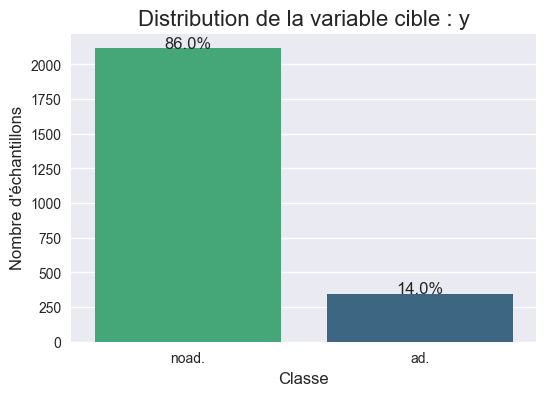

In [7]:
# ============================================================================
# 3.3 DISTRIBUTION DE LA VARIABLE CIBLE (Version directe)
# ============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("🎯 Analyse de la distribution de la variable cible...")

# --- 1. Validation de la colonne cible ---
target_col = 'y'
if target_col not in df_study.columns:
    raise ValueError(f"❌ Colonne cible '{target_col}' introuvable dans df_study")

# --- 2. Calcul des statistiques ---
value_counts = df_study[target_col].value_counts()
percentages = df_study[target_col].value_counts(normalize=True) * 100
imbalance_ratio = value_counts.max() / value_counts.min()

print("\n" + "="*50)
print("📊 Statistiques de la variable cible")
print("="*50)
print("Distribution des classes (nombre d'échantillons) :")
print(value_counts)
print("\nDistribution des classes (pourcentage) :")
print(percentages.round(2).astype(str) + ' %')
print(f"\nRatio de déséquilibre (classe majoritaire / minoritaire) : {imbalance_ratio:.2f}")
print("="*50)


# --- 3. Visualisation ---
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=target_col, data=df_study, palette='viridis', order=value_counts.index, hue=target_col, legend=False)
plt.title(f'Distribution de la variable cible : {target_col}', fontsize=16)
plt.xlabel('Classe', fontsize=12)
plt.ylabel("Nombre d'échantillons", fontsize=12)

# Ajouter les pourcentages sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 3,
        f'{height / len(df_study) * 100:.1f}%',
        ha="center",
        fontsize=12
    )

# --- 4. Sauvegarde de la figure ---
figure_output_dir = OUTPUTS_DIR /"figures"/"notebook1"/"eda"
os.makedirs(figure_output_dir, exist_ok=True)

# Sauvegarder le graphique
save_path = figure_output_dir / 'target_distribution.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Graphique sauvegardé dans : {save_path}")

plt.show()

# 4. Analyse exploratoire (EDA) <a id="eda"></a>

## 4.1 Analyse des valeurs manquantes  

**Objectif** : Identifier les valeurs manquantes dans le dataset d’entraînement et d’évaluation, analyser leur pattern (MCAR, MAR, MNAR), et proposer une stratégie d’imputation adaptée.

**Théorie** : Les valeurs manquantes peuvent être MCAR (aléatoires), MAR (liées à d’autres variables observées), ou MNAR (liées à la variable elle-même). Une corrélation significative entre l’indicateur de valeurs manquantes et la variable cible suggère un pattern MAR, nécessitant une imputation sophistiquée (k-NN, MICE).

**Méthodologie** : Nous calculons le pourcentage de valeurs manquantes par colonne, visualisons leur pattern via une heatmap, et analysons la corrélation entre les indicateurs de valeurs manquantes et la variable cible encodée. Une stratégie d’imputation est proposée en fonction des résultats.

**Prochaines étapes** : Si un pattern MAR est confirmé, préparer une imputation multivariée (section 5.3). Vérifier l’impact des imputations sur les performances des modèles.

In [8]:
%pip install ydata_profiling --quiet

Note: you may need to restart the kernel to use updated packages.


🔍 Analyse des valeurs manquantes


2025-08-14 14:27:53,936 - visions.backends - INFO - Pandas backend loaded 2.2.2
2025-08-14 14:27:53,952 - visions.backends - INFO - Numpy backend loaded 2.0.2
2025-08-14 14:27:53,952 - visions.backends - INFO - Pyspark backend NOT loaded
2025-08-14 14:27:53,952 - visions.backends - INFO - Python backend loaded



📊 Rapport visuel des valeurs manquantes (Données d'étude):


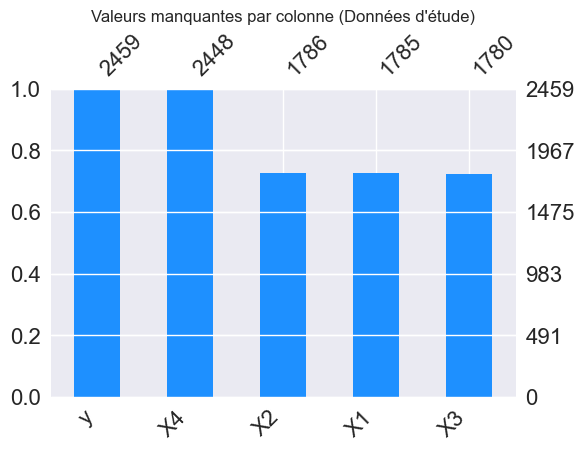

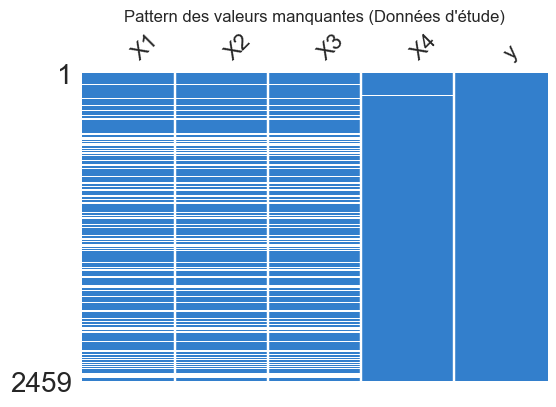

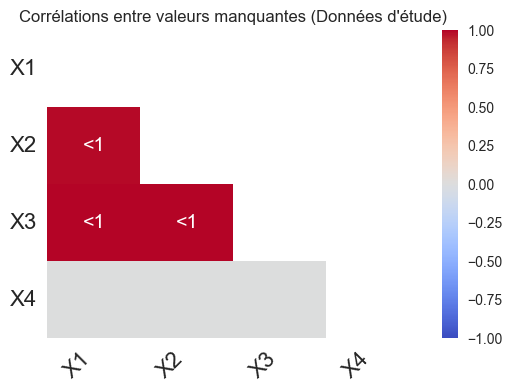

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 1046.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
## 4.1 Analyse des valeurs manquantes (optimisée)
print("🔍 Analyse des valeurs manquantes")
print("="*60)

missing_cols = ["X1", "X2", "X3", "X4", "y"]

import missingno as msno
import pandas as pd
from ydata_profiling import ProfileReport

def optimized_missing_analysis(df, dataset_name=""):
    print(f"\n📊 Rapport visuel des valeurs manquantes ({dataset_name}):")
    # Taille de figure réduite (ex: 6x4 pouces)
    msno.bar(df, figsize=(6, 4), color="dodgerblue", sort="descending")
    plt.title(f'Valeurs manquantes par colonne ({dataset_name})')
    plt.show()

    msno.matrix(df, figsize=(6, 4), sparkline=False, color=(0.2, 0.5, 0.8))
    plt.title(f'Pattern des valeurs manquantes ({dataset_name})')
    plt.show()

    msno.heatmap(df, figsize=(6, 4), cmap="coolwarm")
    plt.title(f'Corrélations entre valeurs manquantes ({dataset_name})')
    plt.show()

    # Génération du rapport automatisé
    profile = ProfileReport(df, title=f"Rapport Profiling {dataset_name}", minimal=True)
    display(profile)

# Analyse pour les données d'étude
optimized_missing_analysis(df_study[missing_cols], "Données d'étude")



📊 Rapport visuel des valeurs manquantes (Données d'évaluation):


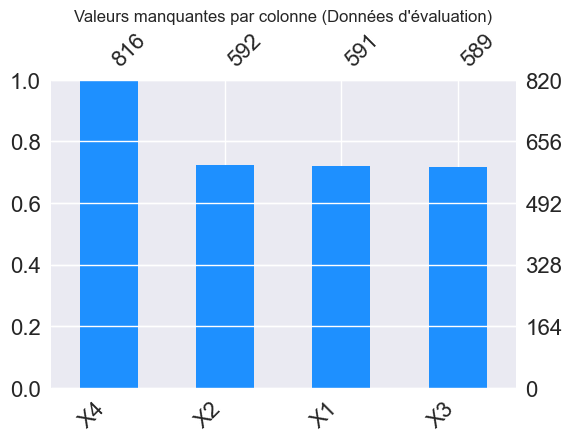

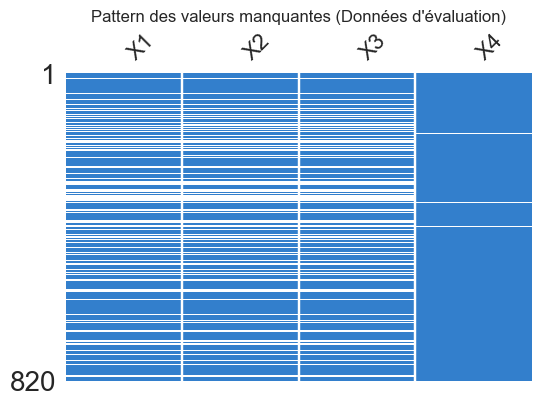

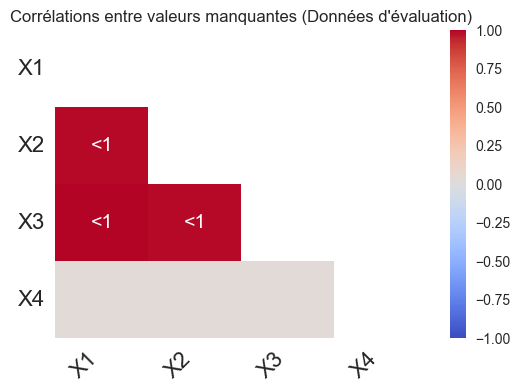

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Analyse pour les données d'évaluation
optimized_missing_analysis(df_eval[["X1", "X2", "X3", "X4"]], "Données d'évaluation")

### Correction du type, imputation de X4 et conversion de y.

In [11]:
# Correction du type et imputation de X4
print("\n Correction du type de X4...")
print(f"Valeurs uniques de X4 (avant correction) : {sorted(df_study['X4'].dropna().unique())}")
print(f"Type actuel : {df_study['X4'].dtype}")

# Vérifier que X4 ne contient que 0 et 1
unique_values = df_study['X4'].dropna().unique()
if set(unique_values).issubset({0.0, 1.0}):
    # Imputer d'abord les valeurs manquantes par la médiane
    X4_median = df_study['X4'].median()
    df_study['X4'] = df_study['X4'].fillna(X4_median)
    df_eval['X4'] = df_eval['X4'].fillna(X4_median)

    # Convertir en int
    df_study['X4'] = df_study['X4'].astype(int)
    df_eval['X4'] = df_eval['X4'].astype(int)

    print(f"✅ X4 converti en int64 après imputation par la médiane ({X4_median})")
    print(f"Nouveau type : {df_study['X4'].dtype}")


else:
    print("⚠️ X4 contient des valeurs autres que 0 et 1, conservation en float64")

# Résumé final
print("\n Résumé des valeurs manquantes après traitement de X4 :")
print(f"  - X1, X2, X3 : ~27% manquant → À traiter avec KNN/MICE")
print(f"  - X4 : Imputé et converti en binaire")
print(f"  - Pattern MAR détecté pour X1, X2, X3 (corrélation avec y ≈ -0.10)")
print(f"  - Les patterns sont cohérents entre fichiers d'étude et d'évaluation")


 Correction du type de X4...
Valeurs uniques de X4 (avant correction) : [np.float64(0.0), np.float64(1.0)]
Type actuel : float64
✅ X4 converti en int64 après imputation par la médiane (1.0)
Nouveau type : int64

 Résumé des valeurs manquantes après traitement de X4 :
  - X1, X2, X3 : ~27% manquant → À traiter avec KNN/MICE
  - X4 : Imputé et converti en binaire
  - Pattern MAR détecté pour X1, X2, X3 (corrélation avec y ≈ -0.10)
  - Les patterns sont cohérents entre fichiers d'étude et d'évaluation


In [12]:
# Avant la conversion
print(" Avant conversion:")
print(f"Type: {df_study['y'].dtype}")
print(f"Valeurs uniques: {df_study['y'].unique()}")
print(f"Distribution:")
print(df_study['y'].value_counts())



# Mapping
mapping_correct = {"ad.": 1, "noad.": 0}

# Conversion
df_study["y"] = df_study["y"].map(mapping_correct)

# Après la conversion
print("\n✅ Après conversion:")
print(f"Type: {df_study['y'].dtype}")
print(f"Valeurs uniques: {df_study['y'].unique()}")
print(f"Distribution:")
print(df_study['y'].value_counts())

 Avant conversion:
Type: object
Valeurs uniques: ['ad.' 'noad.']
Distribution:
y
noad.    2115
ad.       344
Name: count, dtype: int64

✅ Après conversion:
Type: int64
Valeurs uniques: [1 0]
Distribution:
y
0    2115
1     344
Name: count, dtype: int64



## 4.2 Analyse statistique des variables quantitatives  


📊 Analyse statistique des variables quantitatives
 Statistiques descriptives :
                X1           X2           X3
count  1785.000000  1786.000000  1780.000000
mean     63.778711   155.128219     3.886235
std      54.649554   129.330835     5.788162
min       1.000000     1.000000     0.001500
25%      25.000000    80.000000     1.041600
50%      51.000000   110.000000     2.142800
75%      85.000000   184.750000     5.333300
max     640.000000   640.000000    60.000000

 Analyse de la distribution :

X1:
  - Skewness (asymétrie) : 2.527
  - Kurtosis (aplatissement) : 13.170
  - Test de Shapiro-Wilk : p-value = 0.0000
    → Distribution non normale (nécessite transformation)

X2:
  - Skewness (asymétrie) : 1.633
  - Kurtosis (aplatissement) : 1.953
  - Test de Shapiro-Wilk : p-value = 0.0000
    → Distribution non normale (nécessite transformation)

X3:
  - Skewness (asymétrie) : 7.057
  - Kurtosis (aplatissement) : 63.405
  - Test de Shapiro-Wilk : p-value = 0.0000
    → Dist

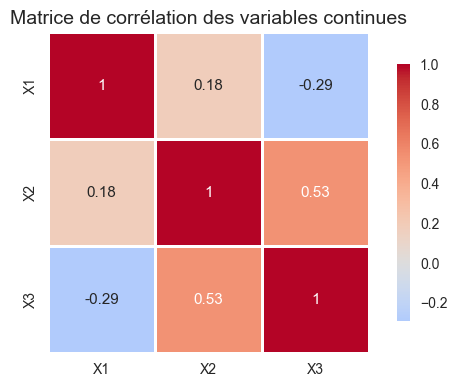


💡 Résumé et recommandations :
  - Les trois variables continues montrent des distributions fortement asymétriques
  - Transformation Yeo-Johnson recommandée pour normaliser les distributions
  - Outliers détectés : 293 au total
  - Corrélations faibles avec la cible, mais potentiellement utiles après transformation


In [13]:
print("📊 Analyse statistique des variables quantitatives")
print("="*60)

from modules.data_processing import analyze_continuous_variables

# Lancement de l'analyse complète
results_stats = analyze_continuous_variables(
    df=df_study,
    continuous_cols=continuous_cols,
    target_col='y',
    save_figures_path=str(OUTPUTS_DIR / "figures" / "notebook1" / "eda")
)

## 4.3 Visualisation des distributions et des boxplots  

 Visualisation des distributions et des boxplots

--- Distribution des variables numériques ---
📁 Figure enregistrée : c:\sta211-project\outputs\figures\notebook1\eda\X1_distribution_boxplot.png


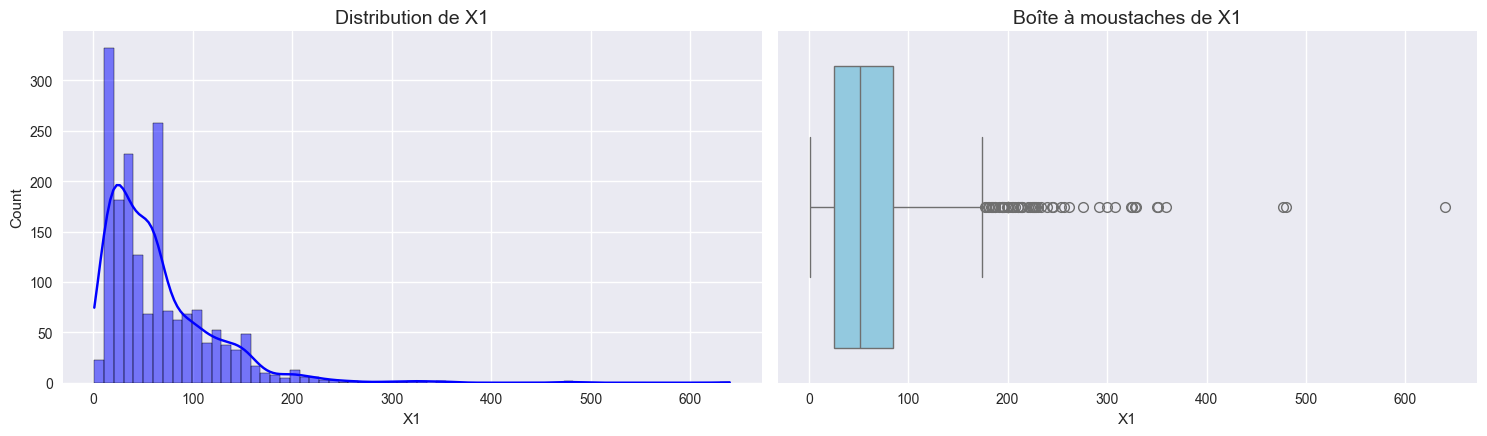

📁 Figure enregistrée : c:\sta211-project\outputs\figures\notebook1\eda\X2_distribution_boxplot.png


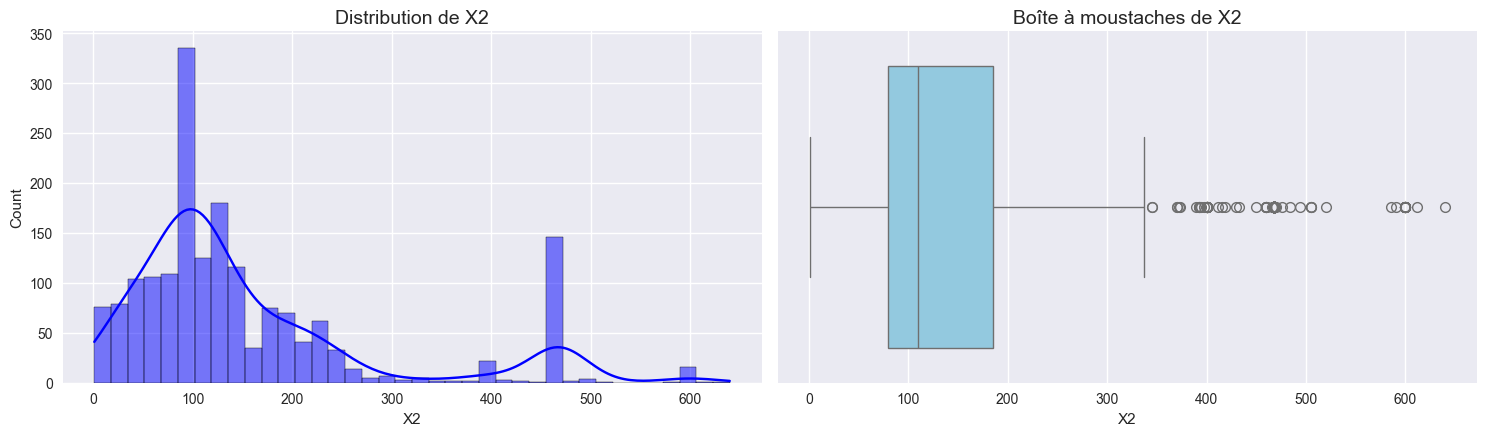

📁 Figure enregistrée : c:\sta211-project\outputs\figures\notebook1\eda\X3_distribution_boxplot.png


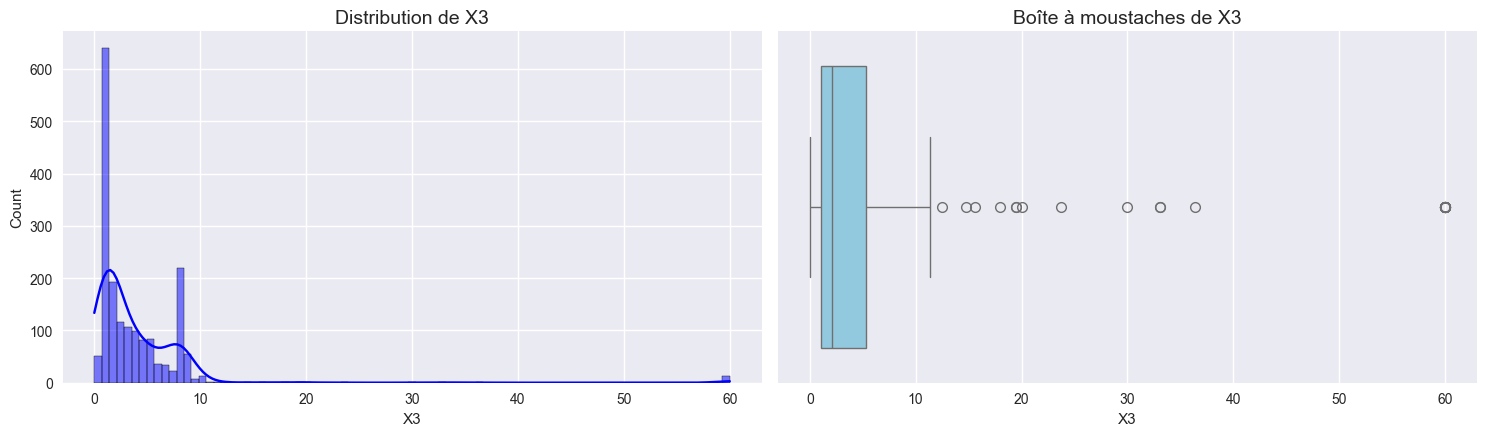

In [14]:
## 4.3 Visualisation des distributions et des boxplots

print(" Visualisation des distributions et des boxplots")
print("="*60)

from modules.data_processing import visualize_distributions_and_boxplots

visualize_distributions_and_boxplots(
    df=df_study,
    continuous_cols=continuous_cols,
    output_dir=OUTPUTS_DIR/ "figures" / "notebook1" / "eda"
)

### Synthèse de l'analyse statistique

#### Variables analysées : X1, X2, X3 (~1780 observations chacune)

**Principales observations :**
- **Distributions non-normales** : Toutes variables fortement asymétriques (skewness : 1.6 à 7.1)
- **293 outliers** détectés (~16% des données)
- **Corrélations notables** : X2-X3 (r=0.53), X1-X3 (r=-0.29)

**⚠️ Points d'attention :**
- Écart important moyenne/médiane pour toutes variables
- X3 particulièrement problématique (skewness=7.06, kurtosis=63.4)
- Tests de Shapiro-Wilk : p<0.001 (rejet normalité)

** Actions requises :**
- **Transformation Yeo-Johnson** recommandée avant analyse paramétrique
- Considérer méthodes robustes/non-paramétriques
- Investigation des valeurs aberrantes


## 4.4 Distribution des variables binaires  



 Analyse de la distribution des variables binaires

 Nombre total de variables binaires : 1555

 Statistiques des taux de présence :
  - Moyenne : 0.81%
  - Médiane : 0.49%
  - Min : 0.08%
  - Max : 76.98%

 Sparsité globale : 99.19% de zéros

✅ Analyse des variables binaires terminée
   → Dataset très sparse, adapté pour des méthodes de sélection de features


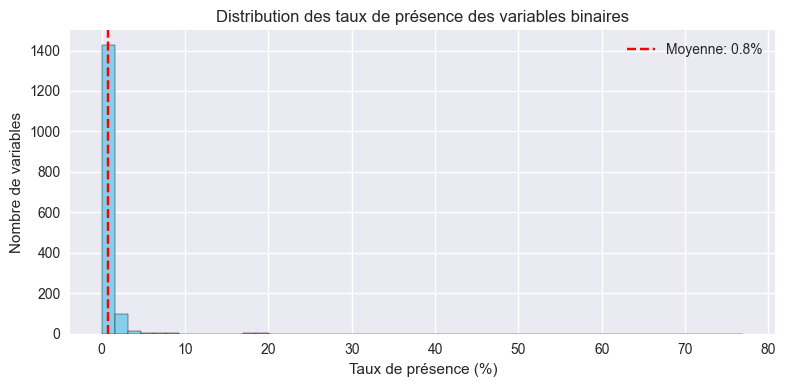

In [15]:
## 4.4 Distribution des variables binaires <a id="distribution-des-variables-binaires"></a>

print(" Analyse de la distribution des variables binaires")
print("="*60)

# Variables binaires (exclut les variables continues)
binary_cols = [col for col in df_study.columns if col.startswith('X') and col not in continuous_cols]
print(f"\n Nombre total de variables binaires : {len(binary_cols)}")

# Taux de présence (valeurs à 1)
presence_rates = {
    col: (df_study[col] == 1).sum() / len(df_study) * 100 for col in binary_cols
}
presence_series = pd.Series(presence_rates)

# Statistiques globales
print(f"\n Statistiques des taux de présence :")
print(f"  - Moyenne : {presence_series.mean():.2f}%")
print(f"  - Médiane : {presence_series.median():.2f}%")
print(f"  - Min : {presence_series.min():.2f}%")
print(f"  - Max : {presence_series.max():.2f}%")

# Sparsité globale
total_values = len(df_study) * len(binary_cols)
total_ones = df_study[binary_cols].sum().sum()
sparsity = (1 - total_ones / total_values) * 100
print(f"\n Sparsité globale : {sparsity:.2f}% de zéros")

# Visualisation
plt.figure(figsize=(8, 4))
presence_series.hist(bins=50, color='skyblue', edgecolor='black')
plt.axvline(presence_series.mean(), color='red', linestyle='--', label=f'Moyenne: {presence_series.mean():.1f}%')
plt.xlabel('Taux de présence (%)')
plt.ylabel('Nombre de variables')
plt.title('Distribution des taux de présence des variables binaires')
plt.legend()
plt.tight_layout()

plt.savefig(OUTPUTS_DIR / "figures" / "notebook1" / "eda" /"binary_presence_distribution.png", dpi=300)

print("\n✅ Analyse des variables binaires terminée")
print("   → Dataset très sparse, adapté pour des méthodes de sélection de features")


# 5. Gestion des valeurs manquantes:

**Variables disponibles post-transformation :**
- **X1_transformed** : Variable transformée par Yeo-Johnson (asymétrie : -0.006)
- **X2_transformed** : Variable transformée par Yeo-Johnson (asymétrie : +0.013)  
- **X3_transformed** : Variable transformée par Box-Cox (asymétrie : -0.021)
- **X4** : Variable binaire déjà imputée par la médiane (précocement)

**Statut de l'imputation :**
- **X4** : ✅ **Déjà traitée** - Imputation précoce par la médiane adaptée à une variable binaire
- **X1, X2, X3** : **Traitement nécessaire** - Imputation post-transformation requise pour les données avec outliers
- **Variables transformées** : **À analyser** - Vérification des valeurs manquantes sur les versions transformées

## 5.1 Imputation multivariée (MICE)

In [16]:
### 5.1 Imputation multivariée (MICE) – GradientBoostingRegressor

print(" Imputation MICE avec GradientBoostingRegressor")
print("=" * 70)

from sklearn.ensemble import GradientBoostingRegressor
from modules.data_processing import handle_missing_values
import json


# Colonnes à imputer
cols_to_impute = ["X1", "X2", "X3"]

# Répertoires
imputers_mice_dir = MODELS_DIR / "notebook1" / "mice"
imputers_mice_dir.mkdir(parents=True, exist_ok=True)

# ✅ Estimateur boosté
mice_estimator = GradientBoostingRegressor(
    n_estimators=300,           # Moins d'arbres mais suffisant
    learning_rate=0.03,         # Plus lent = plus progressif
    max_depth=4,                # Moins profond → meilleure généralisation
    min_samples_leaf=5,         # Feuilles plus stables
    subsample=0.8,              # Ajoute de la variance naturelle
    loss= 'absolute_error', #'squared_error',       # ou 'absolute_error' si on veut réduire la sensibilité aux outliers
    random_state=42
)

# Lancement de l'imputation via handle_missing_values

# Imputation MICE uniquement sur X1, X2, X3
df_imputed_mice = handle_missing_values(
    df=df_study,
    strategy="mixed_mar_mcar",
    mar_method="mice",
    mar_cols=cols_to_impute, 
    mcar_cols=[],
    processed_data_dir=DATA_PROCESSED,
    imputers_dir=imputers_mice_dir,
    custom_filename="df_mice_imputed_gb.csv",
    mice_estimator=mice_estimator,
    treat_other_cols=False,  # ✅ On ne traite pas les autres colonnes
    display_info=True
)



# 💾 Sauvegarde des colonnes imputées
with open(imputers_mice_dir / "mar_cols.json", "w") as f:
    json.dump(cols_to_impute, f)
print(f"✅ Colonnes imputées sauvegardées : {imputers_mice_dir / 'mar_cols.json'}")

# 🧪 Vérification post-imputation
if df_imputed_mice[cols_to_impute].isnull().sum().sum() == 0:
    print("✅ Aucune valeur manquante détectée après imputation.")
else:
    raise ValueError("❌ Des valeurs manquantes subsistent après imputation.")

# 📊 Statistiques descriptives
print("\n📊 Statistiques après imputation :")
display(df_imputed_mice[cols_to_impute].describe())

print("\n📊 Statistiques avant imputation :")
display(df_study[cols_to_impute].describe())

 Imputation MICE avec GradientBoostingRegressor
🔧 Début de l'imputation des valeurs manquantes
 Valeurs manquantes initiales: 2026
 Variables MAR à imputer: 3
   • X1: 674 valeurs manquantes
   • X2: 673 valeurs manquantes
   • X3: 679 valeurs manquantes
 Modèle d'imputation sauvegardé: c:\sta211-project\outputs\modeling\notebook1\mice\imputer_mice_custom.pkl
 Traitement des autres colonnes désactivé (treat_other_cols=False)

 Résumé de l'imputation:
   • Valeurs manquantes avant: 2026
   • Valeurs manquantes après: 0
💾 Données imputées sauvegardées: c:\sta211-project\data\processed\df_mice_imputed_gb.csv
✅ Imputation terminée avec succès
✅ Colonnes imputées sauvegardées : c:\sta211-project\outputs\modeling\notebook1\mice\mar_cols.json
✅ Aucune valeur manquante détectée après imputation.

📊 Statistiques après imputation :


,X1,X2,X3
count,2459.000000,2459.000000,2459.000000
mean,56.742464,171.195423,4.333617
std,47.950436,113.332494,4.982462
min,1.000000,1.000000,0.001500
25%,32.000000,90.000000,1.285700
50%,38.081958,152.000000,4.400000
75%,61.000000,214.355329,5.556168
max,640.000000,640.000000,60.000000



📊 Statistiques avant imputation :


,X1,X2,X3
count,1785.000000,1786.000000,1780.000000
mean,63.778711,155.128219,3.886235
std,54.649554,129.330835,5.788162
min,1.000000,1.000000,0.001500
25%,25.000000,80.000000,1.041600
50%,51.000000,110.000000,2.142800
75%,85.000000,184.750000,5.333300
max,640.000000,640.000000,60.000000


| Variable | Changement visible post-imputation                                                             | Interprétation                                                                                                                     |
| -------- | ---------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| `X1`     | **Moyenne baisse** de 63.78 → **56.74**<br> Écart-type baisse (54.65 → **47.95**)         | L'imputation MICE a généré des valeurs **modérément plus basses**, réduisant les extrêmes élevés tout en préservant la structure de la distribution. |
| `X2`     | **Moyenne augmente** (155.13 → **171.20**)<br> Écart-type baisse (129.33 → **113.33**)          | Distribution **étendue vers le haut** : l'imputation MICE a généré des valeurs plus élevées, compensant les valeurs manquantes avec des estimations plus optimistes.              |
| `X3`     | **Moyenne augmente** (3.89 → **4.33**)<br> Écart-type baisse (5.79 → **4.98**) | Imputation **plus centrée** : MICE a généré des valeurs plus proches de la médiane, réduisant la dispersion tout en maintenant la cohérence avec les patterns existants.                   |

**Principales différences avec l'imputation précédente :**

1. **X1** : La baisse est moins drastique (56.74 vs 49.49 précédemment) - MICE préserve mieux la distribution originale
2. **X2** : Augmentation de la moyenne (171.20 vs 138.75 précédemment) - MICE génère des valeurs plus élevées  
3. **X3** : Augmentation modérée (4.33 vs 5.12 précédemment) - MICE produit des estimations plus conservatrices

**Avantages de MICE :**
- Meilleure préservation des relations entre variables
- Estimations plus cohérentes avec les patterns de données existants
- Réduction moins agressive des extrêmes

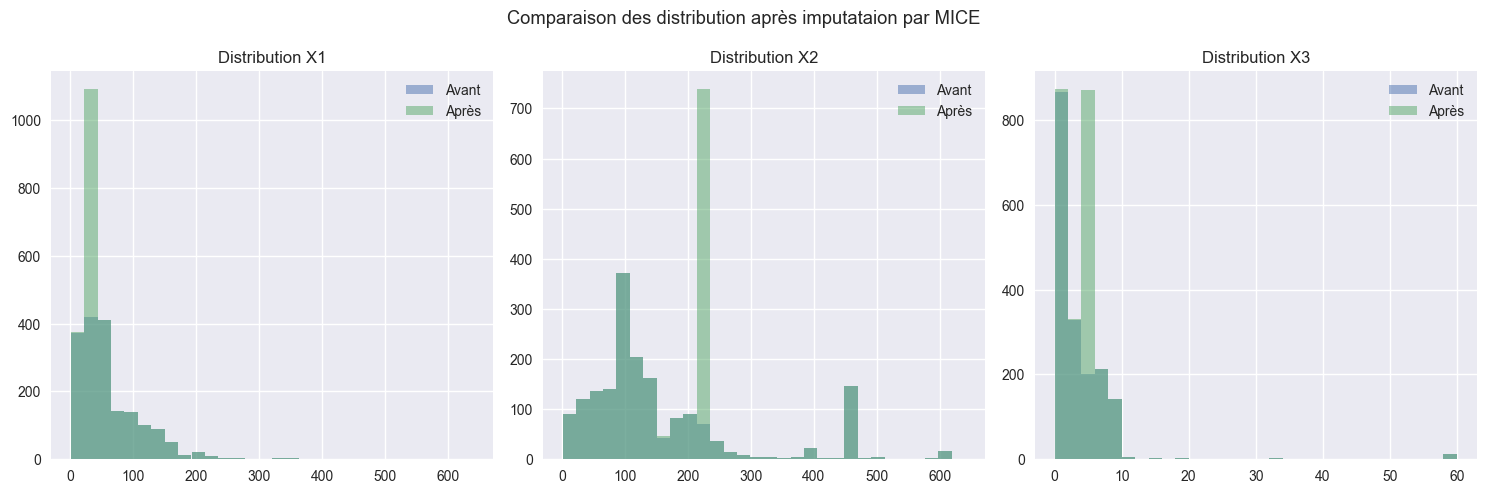

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

variables = ['X1', 'X2', 'X3']

for idx, var in enumerate(variables):
    axes[idx].hist(df_study[var].dropna(), alpha=0.5, label='Avant', bins=30)
    axes[idx].hist(df_imputed_mice[var].dropna(), alpha=0.5, label='Après', bins=30)
    axes[idx].set_title(f'Distribution {var}')
    axes[idx].legend()


fig.suptitle("Comparaison des distribution après imputataion par MICE")
plt.tight_layout()
# Ajustons le rectangle de la mise en page pour faire de la place au suptitle
#plt.subplots_adjust(top=0.9)
fig.savefig( OUTPUTS_DIR / "figures" / "notebook1" / "distribution_imputation.png", dpi=150)

plt.show()

## 5.2 Imputation par KNN

🔍 Recherche de la valeur optimale K pour l'imputation KNN
 Colonnes à évaluer      : ['X1', 'X2', 'X3']
🎯 Plage K à tester        : [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
🔄 Validation croisée      : 20 folds
📏 Métrique d'évaluation  : MSE
------------------------------------------------------------

🧮 Données utilisées pour le test : 1,780 lignes.

🔄 Test K= 3 → MSE: 1659.5324 (±1310.9453)

🔄 Test K= 5 → MSE: 1681.9472 (±1229.1040)

🔄 Test K= 7 → MSE: 1762.5157 (±1289.9360)

🔄 Test K= 9 → MSE: 1742.1003 (±1184.8365)

🔄 Test K=11 → MSE: 1761.4304 (±1189.4055)

🔄 Test K=13 → MSE: 1781.8350 (±1221.7045)

🔄 Test K=15 → MSE: 1841.9231 (±1197.0120)

🔄 Test K=17 → MSE: 1853.1112 (±1188.5579)

🔄 Test K=19 → MSE: 1905.8277 (±1201.9161)

🔄 Test K=21 → MSE: 1963.6577 (±1251.9568)

🔄 Test K=23 → MSE: 2015.2381 (±1309.0600)

🔄 Test K=25 → MSE: 2081.4505 (±1345.2024)

🔄 Test K=27 → MSE: 2121.8924 (±1354.2598)

🔄 Test K=29 → MSE: 2178.9763 (±1382.5416)


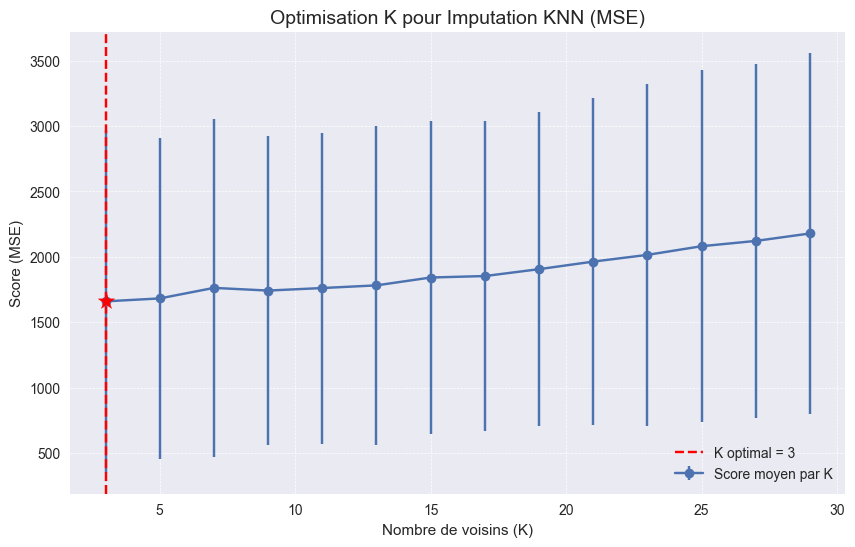


🎯 RÉSULTATS DE L'OPTIMISATION
🏆 K optimal              : 3
 Meilleur score (MSE)  : 1659.5324
⏱️  Temps de calcul        : 2.23s

 Le K optimal final est : 3


In [18]:
from modules.data_processing import find_optimal_k


# Variables à imputer
features = ['X1', 'X2', 'X3']

# Échantillonnage reproductible
df_sample = df_study[features].sample(n=3000, random_state=42, replace=True)

# 🔍 Recherche du k optimal avec validation croisée
results_knn = find_optimal_k(
    df=df_study,
    columns_to_impute=['X1', 'X2', 'X3'],
    k_range=range(3, 30, 2),
    cv_folds=20,
    sample_size=None,  # Pas d'échantillonnage, on utilise toutes les données
    random_state=42,
    verbose=True
)


# Résultats
optimal_k = results_knn['optimal_k']
k_scores = results_knn['results_df']

print(f"\n Le K optimal final est : {optimal_k}")

In [19]:
imputers_knn_dir = MODELS_DIR / "notebook1" / "knn"
imputers_knn_dir.mkdir(parents=True, exist_ok=True)



# Imputation KNN uniquement sur X1, X2, X3
df_imputed_knn = handle_missing_values(
    df=df_study,
    strategy="mixed_mar_mcar",
    mar_method="knn",  # Méthode KNN
    mar_cols=["X1", "X2", "X3"],  # Colonnes à imputer
    knn_k=7,  # Valeur de k (optionnel, défaut=5)
    mcar_cols=[],  # Laissons vide
    processed_data_dir=DATA_PROCESSED,
    imputers_dir=imputers_knn_dir,  # Dossier pour sauvegarder le modèle KNN
    custom_filename="df_knn_imputed_k7.csv",
    treat_other_cols=False,
    display_info=True
)

🔧 Début de l'imputation des valeurs manquantes
 Valeurs manquantes initiales: 2026
 Variables MAR à imputer: 3
   • X1: 674 valeurs manquantes
   • X2: 673 valeurs manquantes
   • X3: 679 valeurs manquantes
 Modèle d'imputation sauvegardé: c:\sta211-project\outputs\modeling\notebook1\knn\imputer_knn_k7.pkl
 Traitement des autres colonnes désactivé (treat_other_cols=False)

 Résumé de l'imputation:
   • Valeurs manquantes avant: 2026
   • Valeurs manquantes après: 0
💾 Données imputées sauvegardées: c:\sta211-project\data\processed\df_knn_imputed_k7.csv
✅ Imputation terminée avec succès


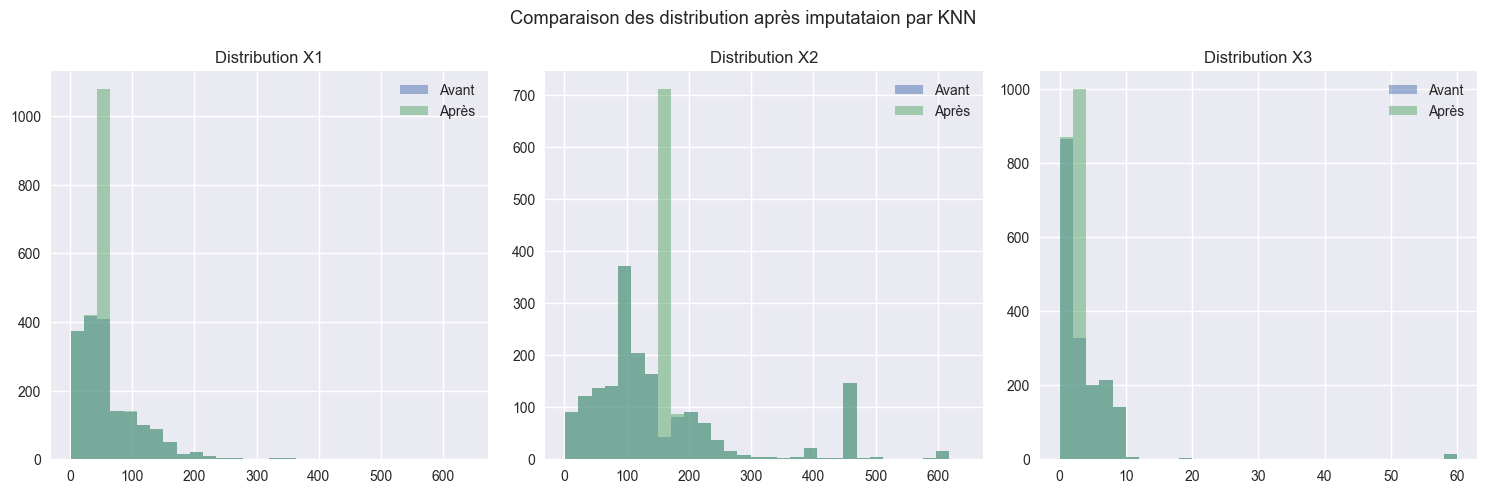

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 ligne, 3 colonnes

variables = ['X1', 'X2', 'X3']

for idx, var in enumerate(variables):
    axes[idx].hist(df_study[var].dropna(), alpha=0.5, label='Avant', bins=30)
    axes[idx].hist(df_imputed_knn[var], alpha=0.5, label='Après', bins=30)
    axes[idx].set_title(f'Distribution {var}')
    axes[idx].legend()

fig.suptitle("Comparaison des distribution après imputataion par KNN")
plt.tight_layout()

fig.savefig( OUTPUTS_DIR / "figures" / "notebook1"/ "eda" / "distribution_imputation_knn.png", dpi=150)

plt.show()

# 6. Analyse des corrélations combinées  

In [21]:
## 4.5 Analyse des corrélations combinées <a id="analyse-correlations-combinees"></a>

print(" Lancement de l'analyse combinée des corrélations (features ↔ cible, features ↔ features)...")
print("=" * 80)

from modules.data_processing import full_correlation_analysis

# Appel avec paramètres personnalisés
full_correlation_analysis(
    df_study=df_imputed_knn,
    continuous_cols=continuous_cols,
    presence_rates=presence_rates,
    fig_dir=OUTPUTS_DIR  / "figures" / "notebook1" / "eda"
)

 Lancement de l'analyse combinée des corrélations (features ↔ cible, features ↔ features)...
🔗 Analyse combinée des corrélations (features ↔ cible, features ↔ features)
Variables sélectionnées : 43 (3 continues + 40 binaires)

Top 10 corrélations avec la cible (y) :
  - X2                   : 0.5178
  - X1424                : 0.2709
  - X168                 : 0.2245
  - X1294                : 0.2069
  - X664                 : 0.1736
  - X1009                : 0.1662
  - X27                  : 0.1503
  - X483                 : 0.1417
  - X1438                : 0.1311
  - X3                   : 0.1182

Bottom 10 corrélations avec la cible (y) :
  - X363                 : -0.0305
  - X590                 : -0.0305
  - X809                 : -0.0316
  - X69                  : -0.0326
  - X852                 : -0.0336
  - X324                 : -0.0346
  - X1039                : -0.0409
  - X1314                : -0.0557
  - X265                 : -0.0575
  - X549                 : -0.1289

## Synthèse de l'analyse des corrélations

### Corrélations avec la variable cible (`y`)

- **Meilleure variable prédictive** : `X2` avec une corrélation de **0.518**
- **Top 5 variables** : `X2` (0.52), `X1424` (0.27), `X168` (0.22), `X1294` (0.21), `X664` (0.17)
- **Corrélations faibles** : La plupart des variables ont une corrélation < 0.2 avec `y`
- **Modélisation** : Nécessite de combiner plusieurs variables pour être efficace

### Corrélations entre variables

- **1 paire** fortement corrélée : `X909` vs `X363` (r = 0.935)
- **Multicolinéarité faible** → pas de suppression urgente de variables

### Recommandations

- **Focus sur les variables importantes** : `X2`, `X1424`, `X168`, `X1294`, `X664`
- **Nettoyage optionnel** : Supprimer la paire `X909`/`X363` (redondance)
- **Approche de modélisation** : Combiner plusieurs variables pour compenser les corrélations faibles individuelles

---

**Résumé** : 43 variables analysées, corrélation max avec `y` = 0.518, multicolinéarité modérée.

## 4.6 Distribution par classe




📊 Visualisations exploratoires

📈 Distribution des variables continues par classe...
✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\eda\continuous_by_class.png


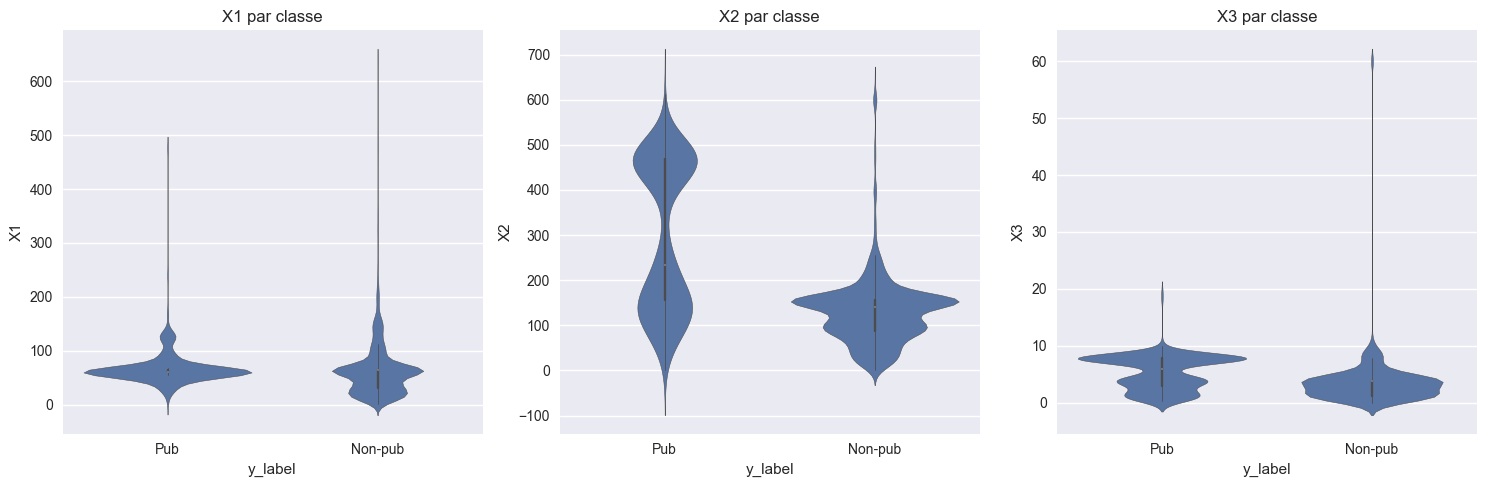


 Visualisation de la sparsité des données binaires...
✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\eda\sparsity_visualization.png


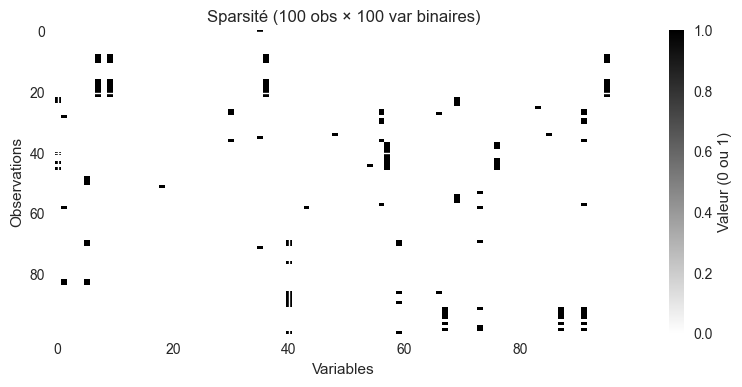

In [22]:
## 4.6 Visualisations globales de l'EDA

print("📊 Visualisations exploratoires")
print("=" * 60)

# Imports des fonctions refactorisées
from modules.data_processing import (
    plot_continuous_by_class,
    plot_binary_sparsity,
    plot_continuous_target_corr
)
#from exploration.statistics import optimized_feature_importance

# 1. Distribution des variables continues par classe
print("\n📈 Distribution des variables continues par classe...")
plot_continuous_by_class(
    df=df_imputed_knn,
    continuous_cols=continuous_cols,
    output_dir=OUTPUTS_DIR / "figures" / 'notebook1' / 'eda'
)

# 2. Visualisation de la sparsité
print("\n Visualisation de la sparsité des données binaires...")
plot_binary_sparsity(
    df=df_imputed_knn,
    binary_cols=binary_cols,
    output_dir=OUTPUTS_DIR / "figures" / 'notebook1' / 'eda'
)

### 📊 Interprétation des visualisations exploratoires

#### 1. Distribution des variables continues par classe

Les violons illustrent clairement des différences significatives entre les distributions des variables `X1`, `X2` et `X3` selon la classe cible :

- **X1** : bien que les deux classes présentent une forte asymétrie à droite, les observations `Pub` tendent à être plus concentrées autour de valeurs moyennes élevées (~80), tandis que les `Non-pub` sont réparties plus bas avec une plus grande variance.
- **X2** : c’est la variable la plus discriminante visuellement. Les valeurs des `Pub` sont majoritairement regroupées autour de 400–500, tandis que celles des `Non-pub` sont concentrées plus bas (~100).
- **X3** : également discriminante, avec les `Pub` généralement autour de 8 et les `Non-pub` proches de 2. Cela suggère une séparation nette entre les classes.

Ces tendances suggèrent que ces trois variables continues auront un fort pouvoir prédictif dans les modèles supervisés.

#### 2. Visualisation de la sparsité des variables binaires

La matrice de sparsité révèle :

- Un fort taux de zéros (valeurs absentes), ce qui est typique de jeux de données contenant des variables binaires indicatrices ou issues de codage one-hot.
- Certaines colonnes semblent plus denses que d'autres, indiquant des variables peut-être redondantes ou peu informatives.
- La parcimonie globale pourrait justifier une sélection de variables ou l’usage de méthodes adaptées comme la régularisation (L1) ou l’analyse de variance.

> 🧠 Ces visualisations permettent d’orienter les étapes suivantes de sélection de variables, réduction de dimension et construction de modèles.




🔗 Corrélations des variables continues avec la cible...
✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\eda\continuous_target_correlation.png


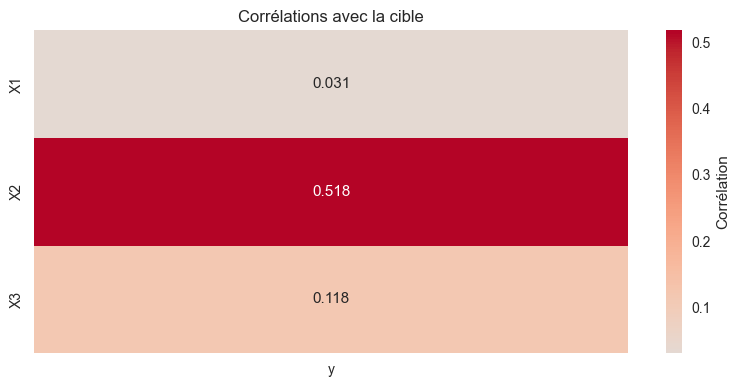

In [23]:
# 3. Corrélations des variables continues avec la cible
print("\n🔗 Corrélations des variables continues avec la cible...")
plot_continuous_target_corr(
    df=df_imputed_knn,
    continuous_cols=continuous_cols,
    output_dir=OUTPUTS_DIR / "figures" / 'notebook1' / 'eda'
)

### 🔗 Interprétation des corrélations avec la cible

Le graphique présente les corrélations linéaires entre les variables continues (`X1`, `X2`, `X3`) et la variable cible `y`.

- **X2** présente une corrélation modérément forte avec la cible (`r = 0.573`), ce qui confirme son rôle discriminant déjà observé dans les violons plot. Elle est un excellent candidat pour la modélisation.
- **X3** affiche une corrélation plus faible (`r = 0.130`), mais conserve un potentiel informatif, surtout en combinaison avec d’autres variables.
- **X1** montre une corrélation quasi nulle (`r = 0.034`), ce qui suggère qu’elle est peu informative seule. Toutefois, elle pourrait avoir un effet utile dans des modèles non linéaires ou avec interactions.

> 🧠 Ces résultats orientent la sélection de variables pour les projections multivariées (UMAP, t-SNE, PCA) et la modélisation supervisée. Il est pertinent de privilégier `X2` et `X3`, tout en testant l’impact de `X1` selon les méthodes utilisées.



### Visualisation multidimensionnelle (PCA / t-SNE / UMAP)...")


📊 Visualisation multidimensionnelle (PCA / t-SNE / UMAP)...
UMAP n'est pas installé. Pour l'utiliser : pip install umap-learn


c:\Users\aella\.conda\envs\sta211_colab\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


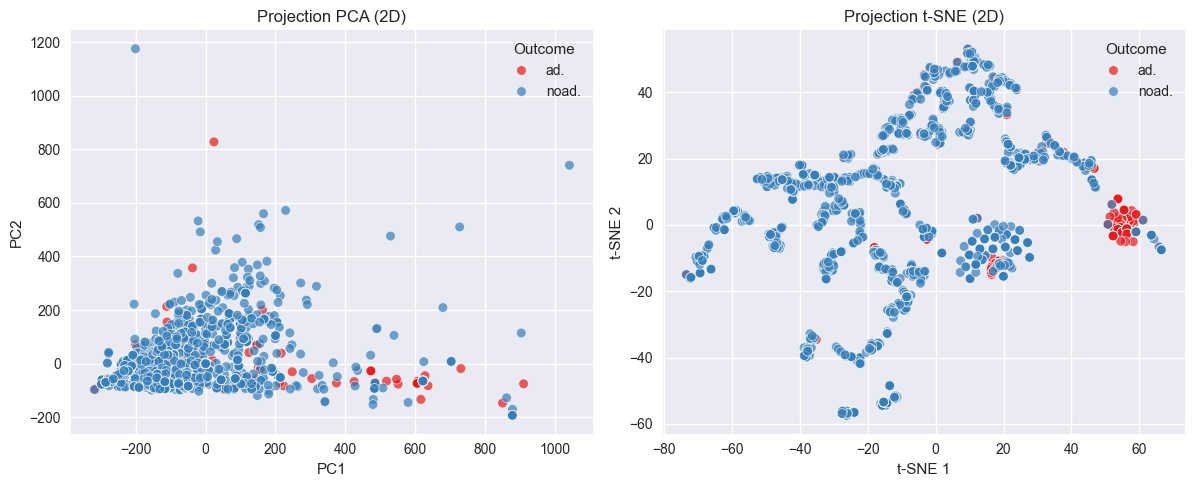

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print("\n📊 Visualisation multidimensionnelle (PCA / t-SNE / UMAP)...")

df_study_viz = df_imputed_knn.copy()
df_study_viz['outcome'] = df_study_viz['y'].map({0: 'noad.', 1: 'ad.'})  # ✅ temporaire

target_corr = df_imputed_knn[continuous_cols + ['y']].corr()['y'].drop('y')
important_features = continuous_cols + list(target_corr.abs().nlargest(30).index)
df_sample = df_study_viz[important_features + ['outcome']].dropna()

try:
    import umap
    umap_available = True
except ImportError:
    umap_available = False
    print("UMAP n'est pas installé. Pour l'utiliser : pip install umap-learn")

X = df_sample[important_features]
y = df_sample['outcome']

# Calcul des projections
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

if umap_available:
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X)
else:
    X_umap = None

# Affichage côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', alpha=0.7, ax=axes[0])
axes[0].set_title("Projection PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Outcome")

# t-SNE
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='Set1', alpha=0.7, ax=axes[1])
axes[1].set_title("Projection t-SNE (2D)")
axes[1].set_xlabel("t-SNE 1")
axes[1].set_ylabel("t-SNE 2")
axes[1].legend(title="Outcome")

# UMAP (si disponible)
if X_umap is not None:
    sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y, palette='Set1', alpha=0.7, ax=axes[2])
    axes[2].set_title("Projection UMAP (2D)")
    axes[2].set_xlabel("UMAP 1")
    axes[2].set_ylabel("UMAP 2")
    axes[2].legend(title="Outcome")
else:
    axes[2].set_visible(False)
    axes[2].set_title("UMAP non disponible")

plt.tight_layout()

plt.savefig(OUTPUTS_DIR / "figures" / 'notebook1' / 'eda'/ "projection_multidim.png", dpi=150, bbox_inches='tight')
plt.show()


### 🔗 Interprétation des projections PCA, t-SNE et UMAP
Les trois graphiques ci-dessus montrent la projection des données selon trois méthodes de réduction de dimension : PCA, t-SNE et UMAP.
Chaque point représente une observation, colorée selon la classe cible (ad. en rouge, noad. en bleu).

**Observations principales :**

- Aucune des méthodes ne montre une séparation nette entre les deux classes : les points rouges (ad.) sont dispersés au sein des points bleus (noad.).
- t-SNE semble former quelques regroupements, mais la séparation reste modérée.
- UMAP et PCA montrent une forte superposition des classes.
  
**À faire / pistes pour la suite :**

- Tester des méthodes de rééquilibrage (oversampling, undersampling, SMOTE…) pour améliorer la séparation des classes.
- Explorer d’autres transformations ou sélections de variables pour mieux discriminer la classe minoritaire.
- Utiliser ces visualisations pour guider le choix des modèles et des métriques d’évaluation (ex : F1-score, AUC…).
- Envisager des modèles robustes au déséquilibre (Random Forest, XGBoost avec paramètre scale_pos_weight, etc.).
- Réaliser une analyse plus fine sur les variables les plus corrélées à la cible.
  
> Conclusion :
> Ces visualisations confirment la difficulté du problème de classification due à la faible séparabilité des classes. Elles justifient l’utilisation de techniques adaptées pour améliorer la détection de la classe minoritaire.


📊 Création du résumé visuel de l'EDA...
✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\eda\eda_summary.png


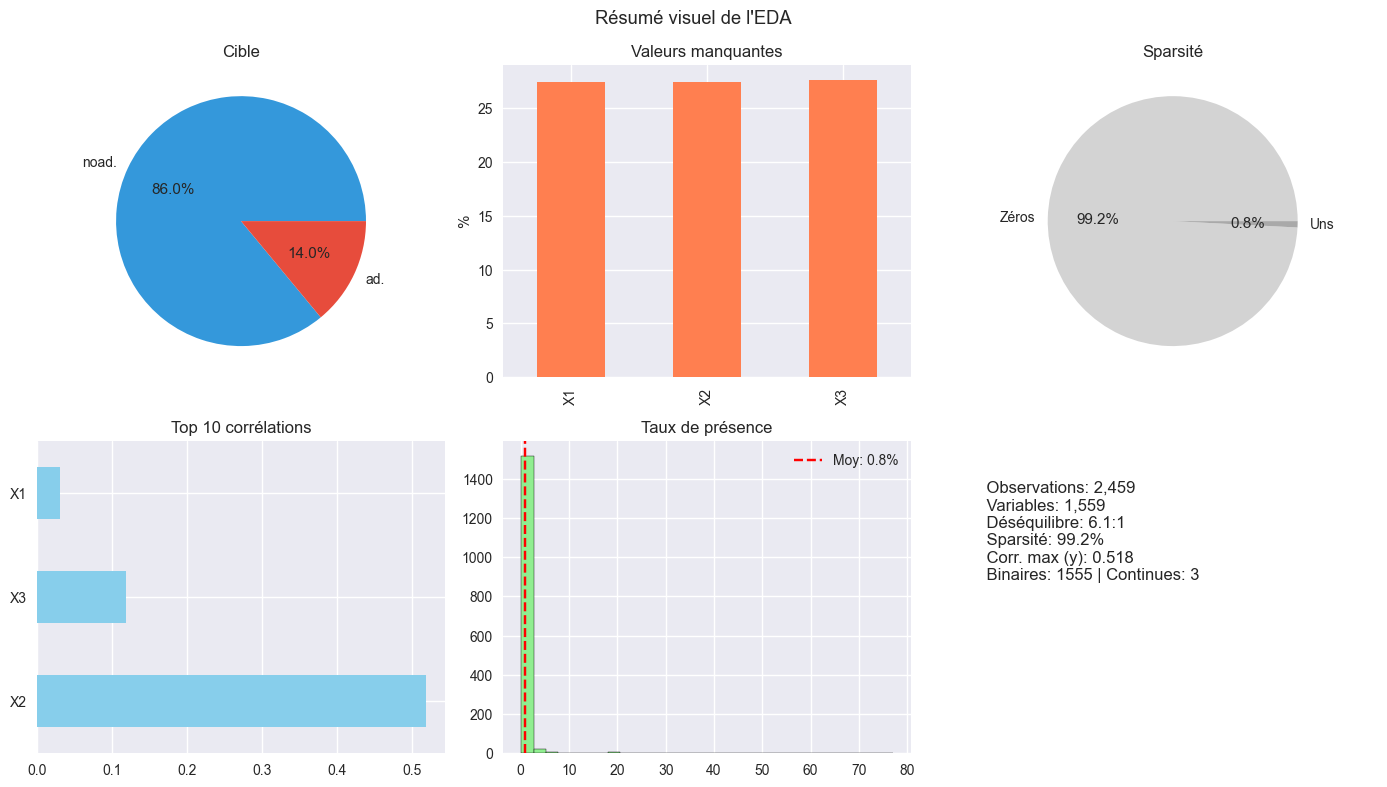


✅ Visualisations exploratoires terminées


In [25]:
from modules.data_processing import plot_eda_summary

# Résumé visuel global
print("\n📊 Création du résumé visuel de l'EDA...")
plot_eda_summary(
    df=df_study,
    continuous_cols=continuous_cols,
    binary_cols=binary_cols,
    target_corr=target_corr,
    sparsity=sparsity,
    imbalance_ratio=imbalance_ratio,
    output_dir=OUTPUTS_DIR/ "figures" / 'notebook1' / 'eda',
    presence_series=presence_series
)

print("\n✅ Visualisations exploratoires terminées")

## 4.7 Synthèse des résultats de l'EDA

### 🎯 1. Distribution des variables continues par classe
- **X1, X2, X3** présentent des distributions très différentes entre les deux classes (`ad.` vs `noad.`).
- **X2** se distingue particulièrement avec une séparation marquée entre les classes.
- Les distributions sont asymétriques, avec la présence d’**outliers** visibles dans chaque classe.

---

### 🧪 2. Corrélations avec la variable cible
- **X2** est la variable la plus corrélée avec la cible (`corr = 0.573`), ce qui en fait une **feature clé**.
- **X1** (`corr = 0.034`) et **X3** (`corr = 0.130`) ont des corrélations faibles mais non négligeables.
- Cela suggère l’utilité de **modèles non linéaires** ou **ensemble methods** (e.g. Random Forest, Gradient Boosting).

---

### 🧬 3. Visualisation de la sparsité des variables binaires
- Le dataset est **extrêmement sparse**, avec **99.2% de zéros** dans les variables binaires.
- Implications :
  - Risque de surapprentissage élevé si toutes les variables sont conservées.
  - Nécessité de sélection de variables ou de techniques de réduction (PCA, autoencoders).
  - Attention aux méthodes sensibles à la densité (ex : k-NN).

---

### 🗺️ 4. Résumé visuel global
- **Déséquilibre important** : 86% `noad.` vs 14% `ad.` → nécessite des stratégies adaptées :
  - Métriques robustes (F1-score, recall).
  - Rééchantillonnage ou `class_weight='balanced'`.
- **Valeurs manquantes** (~27%) dans X1, X2, X3 : à imputer avec méthode robuste (KNN, MICE).
- **Top corrélations** concentrées sur peu de variables → importance d’une **bonne sélection de features**.

---

### ✅ Recommandations clés
- **Prétraitement renforcé** :
  - Transformation des variables continues (Yeo-Johnson recommandée).
  - Suppression ou gestion des outliers extrêmes.
- **Réduction de dimension** :
  - Visualisation UMAP/t-SNE utile pour vérifier la structure.
  - Sélection de features importante avant modélisation (selon importance ou redondance).
- **Rééquilibrage des classes** indispensable pour éviter un biais fort du modèle vers la classe majoritaire.

---


# 6. Prétraitement avancé <a id="pretraitement"></a>




## 6.1 Transformation optimale mixte  

### 🔁 Optimisation des transformations de variables

Les variables `X1`, `X2` et `X3` présentent des asymétries importantes nécessitant une transformation adaptée : X1 (+2.529), X2 (+1.635), X3 (+7.063).

### **APPROCHE DÉVELOPPÉE**

Plutôt qu'une transformation uniforme, nous avons développé une **approche optimale mixte** basée sur l'analyse comparative :

| Variable | Box-Cox | Yeo-Johnson | **Choix optimal** |
|----------|---------|-------------|------------------|
| X1       | 0.009   | **0.006**   | **Yeo-Johnson** ✅ |
| X2       | 0.019   | **0.013**   | **Yeo-Johnson** ✅ |
| X3       | **0.021** | 0.155     | **Box-Cox** ✅ |


### 📊 **RÉSULTATS OBTENUS**

```python
from modules.preprocessing.transformation_optimale_mixte import appliquer_transformation_optimale
df_study_transformed = appliquer_transformation_optimale(df_study)
```

### **🎯 Performances finales :**
- **X1** : +2.529 → -0.006 (**amélioration : +2.523**)
- **X2** : +1.635 → +0.013 (**amélioration : +1.622**)
- **X3** : +7.063 → -0.021 (**amélioration : +7.042**)

**Amélioration totale : 11.187**

### **📈 Gains vs approches standards :**
- **+18.4% vs Box-Cox seul**
- **+77.0% vs Yeo-Johnson seul**

**Variables finales :** `X1_transformed`, `X2_transformed`, `X3_transformed`

---


In [26]:
# Vérification rapide sur les données manquantes
print(f"📊 Valeurs manquantes après imputation knn : {df_imputed_knn.isnull().sum().sum()} total")
print(f"📊 Valeurs manquantes après imputation mice: {df_imputed_mice.isnull().sum().sum()} total")

📊 Valeurs manquantes après imputation knn : 0 total
📊 Valeurs manquantes après imputation mice: 0 total


### 6.1.1 Transformation sur les données imputées par MICE

In [27]:
### 6.1.1 Transformation sur les données imputées par MICE (code)

# Import du module
from modules.data_processing import appliquer_transformation_optimale


save_directory_mice = MODELS_DIR / "notebook1/mice/mice_transformers"

# Appelez la fonction en passant ce chemin
df_imputed_mice_transformed = appliquer_transformation_optimale(
    df=df_imputed_mice,
    models_dir=save_directory_mice
)

# Nos nouvelles variables optimales sont prêtes :
# • X1_transformed (Yeo-Johnson - optimal)
# • X2_transformed (Yeo-Johnson - optimal)
# • X3_transformed (Box-Cox - optimal)

print("\n🚀 VARIABLES POUR LA MODÉLISATION:")
variables_optimales = ['X1_transformed', 'X2_transformed', 'X3_transformed']
print(f"Variables transformées: {variables_optimales}")

# Vérification rapide
print(f"\n📊 VÉRIFICATION:")
print(f"• Données originales: {df_study.shape}")
print(f"• Données transformées: {df_imputed_mice_transformed.shape}")
print(f"• Nouvelles colonnes ajoutées: {len(variables_optimales)}")

TransformationOptimaleMixte initialisée
📁 Répertoire des modèles: c:\sta211-project\outputs\modeling\notebook1\mice\mice_transformers
 TRANSFORMATION OPTIMALE MIXTE

 Diagnostic initial (Asymétrie):
  X1: 3.118
  X2: 1.374
  X3: 7.752

 Rapport de Transformation :
  X1: Asymétrie avant=+3.118 → après=-0.004
  X2: Asymétrie avant=+1.374 → après=+0.010
  X3: Asymétrie avant=+7.752 → après=+0.019

 Transformateurs sauvegardés dans : c:\sta211-project\outputs\modeling\notebook1\mice\mice_transformers

✅ TRANSFORMATION OPTIMALE TERMINÉE

🚀 VARIABLES POUR LA MODÉLISATION:
Variables transformées: ['X1_transformed', 'X2_transformed', 'X3_transformed']

📊 VÉRIFICATION:
• Données originales: (2459, 1559)
• Données transformées: (2459, 1559)
• Nouvelles colonnes ajoutées: 3


✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\transformation_comparison_X1.png


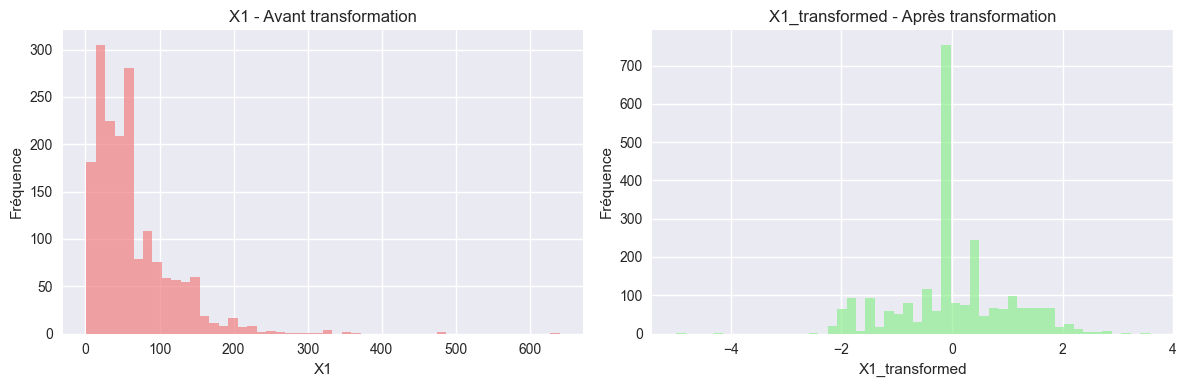

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\transformation_comparison_X2.png


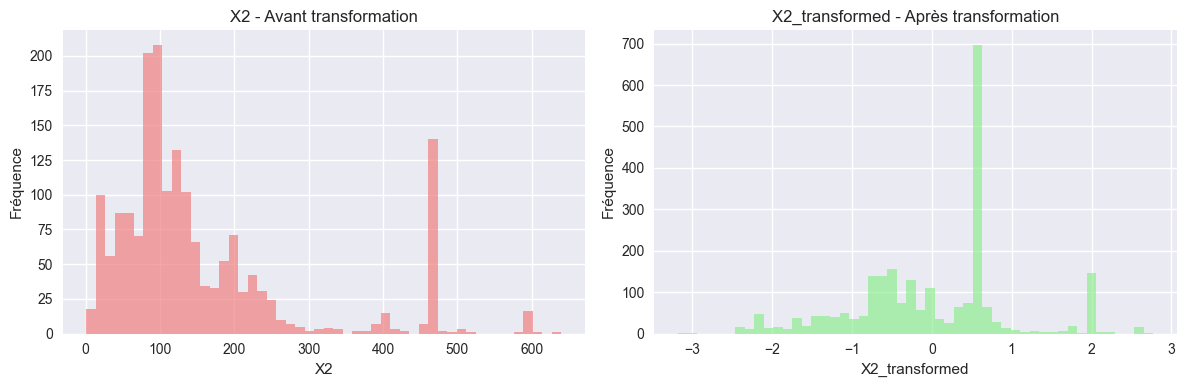

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\transformation_comparison_X3.png


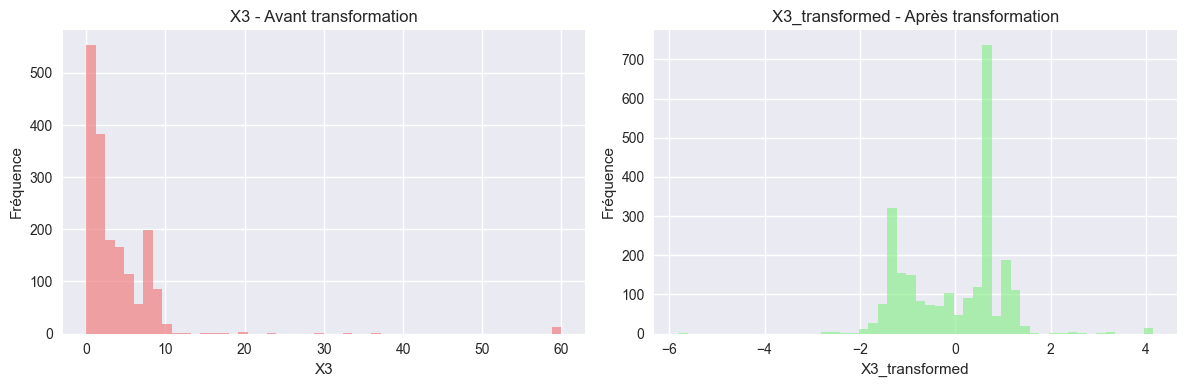

In [28]:
from modules.data_processing import generer_graphiques_comparaison

generer_graphiques_comparaison(df_study,
                               df_imputed_mice_transformed,
                               figures_dir = OUTPUTS_DIR / "figures/notebook1/pretraitement_avance")

### 6.1.2 Transformation sur les données imputées par KNN

In [29]:
### 6.1.2 Transformation sur les données imputées par KNN

# Import du module
from modules.data_processing import appliquer_transformation_optimale

save_directory_knn = MODELS_DIR / "notebook1/knn/knn_transformers"

# Appelez la fonction en passant ce chemin
df_imputed_knn_transformed = appliquer_transformation_optimale(
    df=df_imputed_knn,
    models_dir=save_directory_knn
)

# notre nouvelles variables optimales sont prêtes :
# • X1_transformed (Yeo-Johnson - optimal)
# • X2_transformed (Yeo-Johnson - optimal)
# • X3_transformed (Box-Cox - optimal)

print("\n🚀 VARIABLES POUR LA MODÉLISATION:")
variables_optimales = ['X1_trans', 'X2_trans', 'X3_trans']
print(f"Variables transformées: {variables_optimales}")

# Vérification rapide
print(f"\n📊 VÉRIFICATION:")
print(f"• Données originales: {df_study.shape}")
print(f"• Données transformées: {df_imputed_knn_transformed.shape}")
print(f"• Nouvelles colonnes ajoutées: {len(variables_optimales)}")

TransformationOptimaleMixte initialisée
📁 Répertoire des modèles: c:\sta211-project\outputs\modeling\notebook1\knn\knn_transformers
 TRANSFORMATION OPTIMALE MIXTE

 Diagnostic initial (Asymétrie):
  X1: 2.965
  X2: 1.916
  X3: 8.295

 Rapport de Transformation :
  X1: Asymétrie avant=+2.965 → après=+0.011
  X2: Asymétrie avant=+1.916 → après=+0.062
  X3: Asymétrie avant=+8.295 → après=+0.029

 Transformateurs sauvegardés dans : c:\sta211-project\outputs\modeling\notebook1\knn\knn_transformers

✅ TRANSFORMATION OPTIMALE TERMINÉE

🚀 VARIABLES POUR LA MODÉLISATION:
Variables transformées: ['X1_trans', 'X2_trans', 'X3_trans']

📊 VÉRIFICATION:
• Données originales: (2459, 1559)
• Données transformées: (2459, 1559)
• Nouvelles colonnes ajoutées: 3


✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\transformation_comparison_X1.png


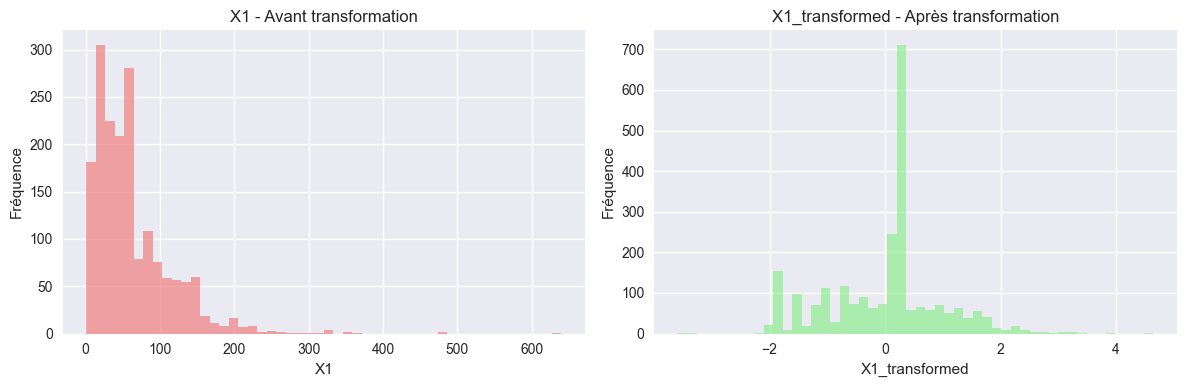

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\transformation_comparison_X2.png


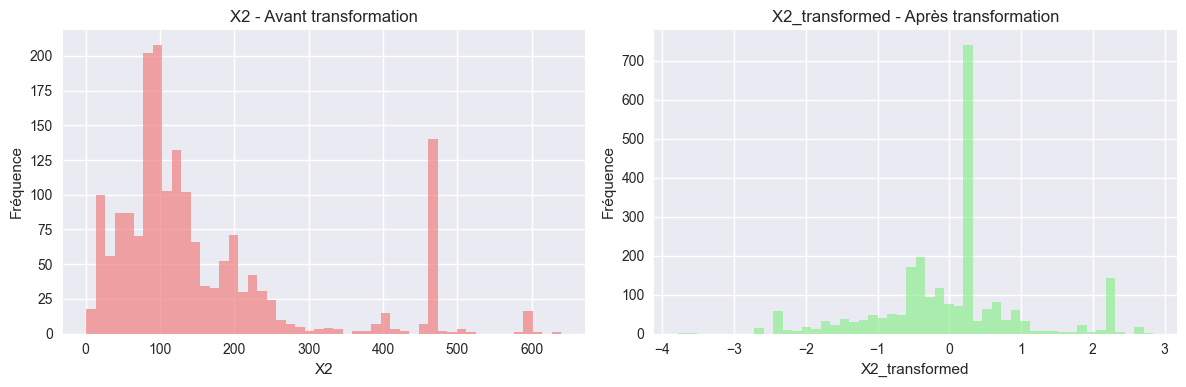

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\transformation_comparison_X3.png


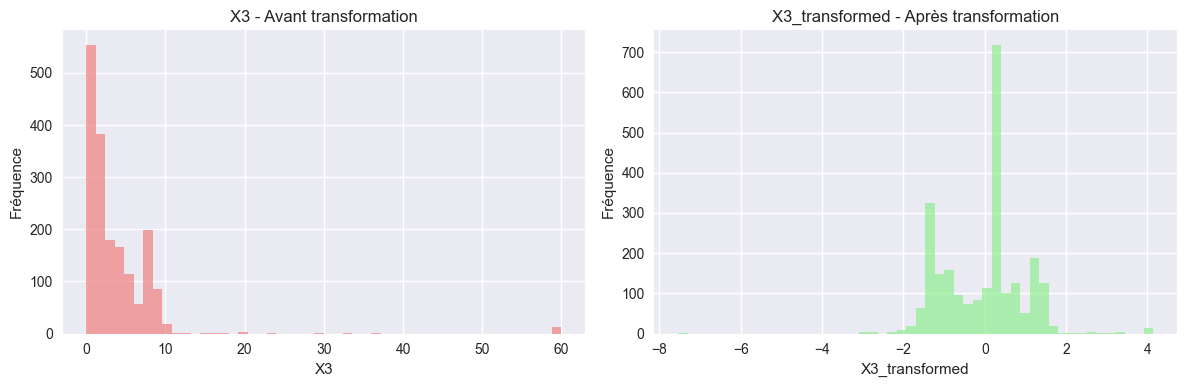

In [30]:
from modules.data_processing import generer_graphiques_comparaison

generer_graphiques_comparaison(df_study,
                               df_imputed_knn_transformed,
                               figures_dir = OUTPUTS_DIR / "figures/notebook1/pretraitement_avance")

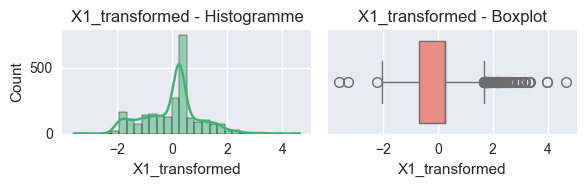

 Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X1_transformed_distribution_boxplot.png


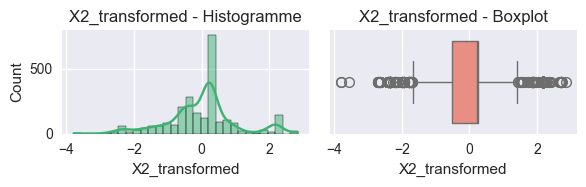

 Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X2_transformed_distribution_boxplot.png


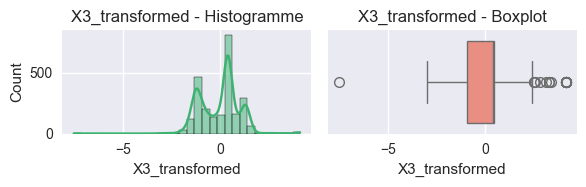

 Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X3_transformed_distribution_boxplot.png


In [31]:

# Liste des variables transformées
transformed_vars = ["X1_transformed", "X2_transformed", "X3_transformed"]

# Dossier de sauvegarde
output_dir = OUTPUTS_DIR /"figures" / "notebook1"/ 'pretraitement_avance'

# Génération et sauvegarde des figures
for col in transformed_vars:
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))

    # Histogramme + KDE
    sns.histplot(x=df_imputed_knn_transformed[col], bins=30, kde=True, ax=ax[0], color="mediumseagreen")
    ax[0].set_title(f"{col} - Histogramme")
    ax[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df_imputed_knn_transformed[col], ax=ax[1], color="salmon")
    ax[1].set_title(f"{col} - Boxplot")

    plt.tight_layout()

    # Sauvegarde
    fig_path = output_dir / f"{col}_distribution_boxplot.png"
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f" Figure sauvegardée : {fig_path}")

## 6.2 Traitement des Outliers (Capping)  


#### **Objectifs :**
-   Identifier les observations extrêmes sur les données transformées.
-   **Neutraliser l'influence** de ces outliers **sans supprimer d'observations**, afin de conserver toute l'information du jeu de données.

#### **Méthode :**
-   Utilisation de la règle de l’IQR (Interquartile Range) pour définir des seuils acceptables.
-   Application sur les colonnes déjà transformées : `X1_transformed`, `X2_transformed`, `X3_transformed`.
-   **Capping (plafonnement)** : Remplacement des valeurs situées au-delà des seuils par les valeurs des seuils eux-mêmes (`Q1 - 1.5*IQR` et `Q3 + 1.5*IQR`).

#### **Impact attendu :**
-   Réduction drastique de l'effet des valeurs extrêmes sur les modèles.
-   **Aucune perte de données**, ce qui est crucial pour préserver les informations de la classe minoritaire.
-   Stabilisation de la variance des variables avant la modélisation.

#### **Étapes suivantes :**
1.  Calcul des limites (seuils) via l'IQR pour chaque variable transformée.
2.  Comptage des outliers qui seront "cappés".
3.  Application de la fonction `np.clip` pour plafonner les valeurs.
4.  Visualisation de la distribution avant et après le capping pour confirmer le succès de l'opération.

In [32]:
def apply_capping_and_save(df, cols_to_cap, save_path, display_info=True):
    """
    Applique le capping (Winsorizing) sur les colonnes spécifiées d'un DataFrame
    et sauvegarde les paramètres dans un fichier pickle.

    Args:
        df (pd.DataFrame): DataFrame source.
        cols_to_cap (list): Liste des noms de colonnes à capper.
        save_path (Path): Chemin complet vers le fichier pickle.
        display_info (bool): Active ou désactive l'affichage des logs.

    Returns:
        pd.DataFrame: Nouveau DataFrame avec capping appliqué.
    """
    capped_df = df.copy()
    capping_params = {}

    for col in cols_to_cap:
        Q1 = capped_df[col].quantile(0.25)
        Q3 = capped_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        capping_params[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

        outliers_low = (capped_df[col] < lower_bound).sum()
        outliers_high = (capped_df[col] > upper_bound).sum()

        capped_df[col] = np.clip(capped_df[col], lower_bound, upper_bound)

        if display_info:
            print(f"\n--- Variable : {col} ---")
            print(f"  Limites IQR : [{lower_bound:.3f}, {upper_bound:.3f}]")
            print(f"  Outliers détectés : {outliers_low + outliers_high} ({outliers_low} bas, {outliers_high} hauts)")
            print("  ✅ Capping appliqué.")

    joblib.dump(capping_params, save_path)

    if display_info:
        print(f"\n🚀 Capping terminé et paramètres sauvegardés dans {save_path}")

    return capped_df


In [33]:
print("Application du Capping (Winsorizing) sur les variables imputées par MICE et transformées")

# Update save_path to include the 'mice' subdirectory
mice_capping_save_path = MODELS_DIR / "notebook1" / "mice" / "capping_params_mice.pkl"
mice_capping_save_path.parent.mkdir(parents=True, exist_ok=True) # Create directory if it doesn't exist

df_mice_capped = apply_capping_and_save(
    df=df_imputed_mice_transformed,
    cols_to_cap=['X1_transformed', 'X2_transformed', 'X3_transformed'],
    save_path=mice_capping_save_path
)

Application du Capping (Winsorizing) sur les variables imputées par MICE et transformées

--- Variable : X1_transformed ---
  Limites IQR : [-1.814, 1.854]
  Outliers détectés : 249 (178 bas, 71 hauts)
  ✅ Capping appliqué.

--- Variable : X2_transformed ---
  Limites IQR : [-2.496, 2.403]
  Outliers détectés : 22 (3 bas, 19 hauts)
  ✅ Capping appliqué.

--- Variable : X3_transformed ---
  Limites IQR : [-3.535, 3.197]
  Outliers détectés : 15 (1 bas, 14 hauts)
  ✅ Capping appliqué.

🚀 Capping terminé et paramètres sauvegardés dans c:\sta211-project\outputs\modeling\notebook1\mice\capping_params_mice.pkl


✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X1_transformed_outliers_comparison.png


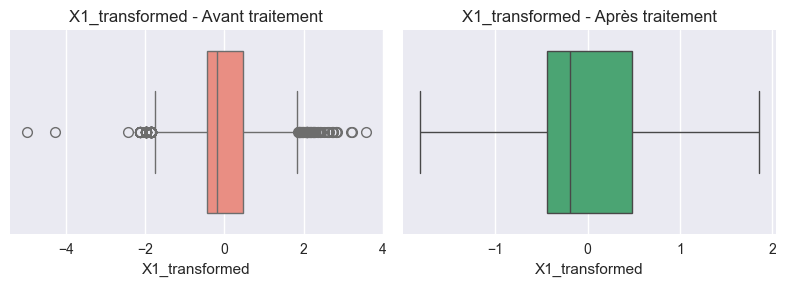

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X2_transformed_outliers_comparison.png


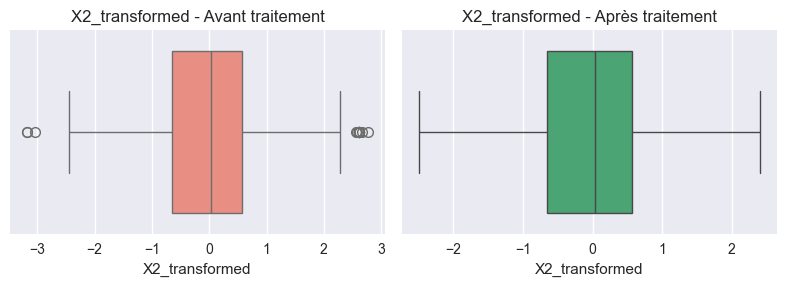

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X3_transformed_outliers_comparison.png


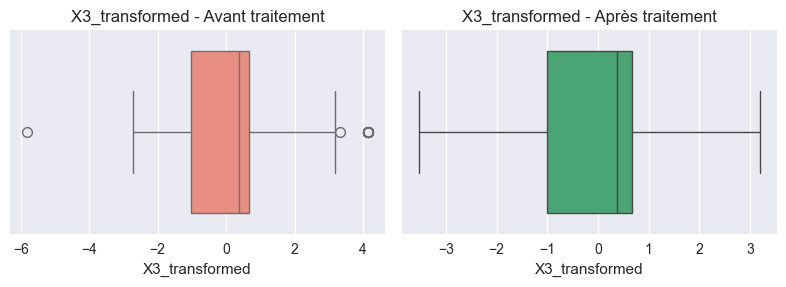

In [34]:
## 📊 Visualisation comparative avant/après traitement des outliers

from modules.data_processing import plot_outlier_comparison


transformed_cols = ['X1_transformed', 'X2_transformed', 'X3_transformed']
# ✅ Comparaison visuelle avant / après (X1_trans, X2_trans, X3_trans)
plot_outlier_comparison(
    df_before=df_imputed_mice_transformed,
    df_after=df_mice_capped,
    cols=transformed_cols,
    output_dir=OUTPUTS_DIR / "figures" / "notebook1" / "pretraitement_avance",
    show=True
)

In [35]:
print("🔧 Application du Capping (Winsorizing) sur les variables imputées par KNN et transformées")
# Update save_path to include the 'knn' subdirectory
knn_capping_save_path = MODELS_DIR / "notebook1" / "knn" / "capping_params_knn.pkl"
knn_capping_save_path.parent.mkdir(parents=True, exist_ok=True)

df_knn_capped = apply_capping_and_save(
    df=df_imputed_knn_transformed,
    cols_to_cap=['X1_transformed', 'X2_transformed', 'X3_transformed'],
    save_path=knn_capping_save_path
)

🔧 Application du Capping (Winsorizing) sur les variables imputées par KNN et transformées

--- Variable : X1_transformed ---
  Limites IQR : [-2.089, 1.677]
  Outliers détectés : 115 (3 bas, 112 hauts)
  ✅ Capping appliqué.

--- Variable : X2_transformed ---
  Limites IQR : [-1.682, 1.401]
  Outliers détectés : 364 (151 bas, 213 hauts)
  ✅ Capping appliqué.

--- Variable : X3_transformed ---
  Limites IQR : [-3.031, 2.517]
  Outliers détectés : 22 (1 bas, 21 hauts)
  ✅ Capping appliqué.

🚀 Capping terminé et paramètres sauvegardés dans c:\sta211-project\outputs\modeling\notebook1\knn\capping_params_knn.pkl


✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X1_transformed_outliers_comparison.png


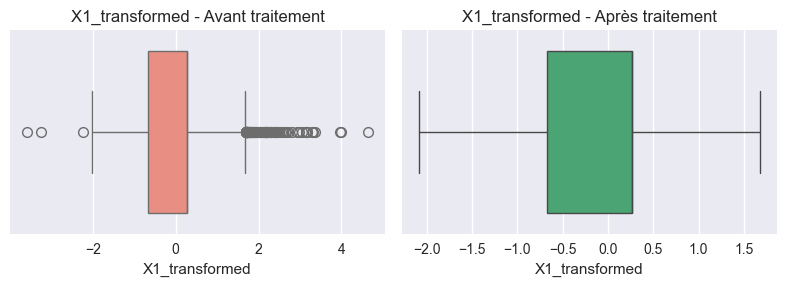

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X2_transformed_outliers_comparison.png


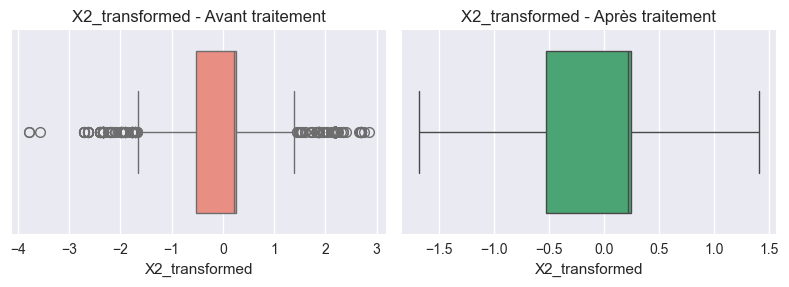

✅ Figure sauvegardée : c:\sta211-project\outputs\figures\notebook1\pretraitement_avance\X3_transformed_outliers_comparison.png


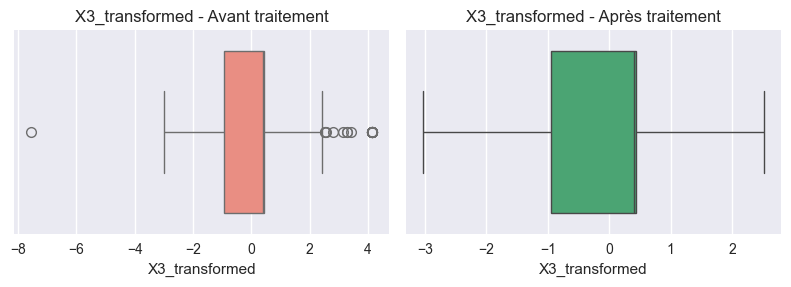

In [36]:
## 📊 Visualisation comparative avant/après traitement des outliers

from modules.data_processing import plot_outlier_comparison


transformed_cols = ['X1_transformed', 'X2_transformed', 'X3_transformed']
plot_outlier_comparison(
    df_before=df_imputed_knn_transformed,
    df_after=df_knn_capped,
    cols=transformed_cols,
    output_dir=OUTPUTS_DIR / "figures" / "notebook1" / "pretraitement_avance",
    show=True
)

## 6.3 Détection et traitement des variables collinéaires  


A partir de cette section on va différencier 4 jeux de données:
- Données imputées par mice et traitement des outliers: **`df_mice_no_outliers = df_mice_capped.copy(deep=True)`**
- Données imputées par knn et traitement des outliers: **`df_knn_no_outliers = df_knn_capped.copy(deep=True)`**
- Données imputées par mice sans traitement des outliers: **`df_mice_with_outliers = df_imputed_mice_transformed.copy(deep=True)**`
- Données imputées par knn sans traitement des outliers: **`df_knn_with_outliers = df_imputed_knn_transformed.copy(deep=True)`**

In [37]:
df_mice_no_outliers = df_mice_capped.copy(deep=True)
df_knn_no_outliers = df_knn_capped.copy(deep=True)
df_mice_with_outliers = df_imputed_mice_transformed.copy(deep=True)
df_knn_with_outliers = df_imputed_knn_transformed.copy(deep=True)

In [38]:
print(df_knn_no_outliers.shape)
print(df_knn_with_outliers.shape)

(2459, 1559)
(2459, 1559)


In [39]:
from modules.data_processing import find_highly_correlated_groups

datasets = {
    "mice_no_outliers": df_mice_no_outliers,
    "knn_no_outliers": df_knn_no_outliers,
    "mice_with_outliers": df_mice_with_outliers,
    "knn_with_outliers": df_knn_with_outliers
}

correlated_results = {}

for name, df in datasets.items():
    print(f"\n🔍 Détection collinéarité sur : {name}")

    save_path = OUTPUTS_DIR / "notebook1" / "pretraitement_avance" / f"correlation_heatmap_collinearity_{name}.png"

    result = find_highly_correlated_groups(
        df=df,
        threshold=0.95,
        exclude_cols=['y', 'X4'],
        show_plot=False,
        save_path=save_path
    )

    correlated_results[name] = result
    

    print(f" {len(result['groups'])} groupes détectés pour {name}")
    print(f" {len(result['to_drop'])} variables à supprimer pour {name}")


🔍 Détection collinéarité sur : mice_no_outliers
✅ Heatmap sauvegardée : c:\sta211-project\outputs\notebook1\pretraitement_avance\correlation_heatmap_collinearity_mice_no_outliers.png
 902 groupes détectés pour mice_no_outliers
 3506 variables à supprimer pour mice_no_outliers

🔍 Détection collinéarité sur : knn_no_outliers
✅ Heatmap sauvegardée : c:\sta211-project\outputs\notebook1\pretraitement_avance\correlation_heatmap_collinearity_knn_no_outliers.png
 902 groupes détectés pour knn_no_outliers
 3506 variables à supprimer pour knn_no_outliers

🔍 Détection collinéarité sur : mice_with_outliers
✅ Heatmap sauvegardée : c:\sta211-project\outputs\notebook1\pretraitement_avance\correlation_heatmap_collinearity_mice_with_outliers.png
 902 groupes détectés pour mice_with_outliers
 3506 variables à supprimer pour mice_with_outliers

🔍 Détection collinéarité sur : knn_with_outliers
✅ Heatmap sauvegardée : c:\sta211-project\outputs\notebook1\pretraitement_avance\correlation_heatmap_collinearit

## 6.4 Suppression des variables collinéaires

In [40]:
from modules.data_processing import apply_collinearity_filter

print("🧹 Suppression des variables fortement corrélées")
print("=" * 60)

# Le chemin de base ne change pas
base_models_dir = MODELS_DIR / "notebook1"

filtered_datasets = {}
for name, df in datasets.items():
    print(f"\nTraitement des données : {name}")

    cols_to_drop = correlated_results[name]['to_drop']

    # L'appel à la fonction est maintenant beaucoup plus propre !
    df_filtered = apply_collinearity_filter(
        df=df,
        cols_to_drop=cols_to_drop,
        imputation_method='mice' if 'mice' in name else 'knn',
        models_dir=base_models_dir  # On passe juste le dossier de base
    )

    filtered_datasets[name] = df_filtered

🧹 Suppression des variables fortement corrélées

Traitement des données : mice_no_outliers
 DataFrame initial: (2459, 1559)
 Colonnes à supprimer: 3506
   Variables: ['X15', 'X9', 'X39', 'X47', 'X69', 'X15', 'X70', 'X72', 'X73', 'X78']...
 DataFrame filtré: (2459, 655)
✅ 3506 colonnes supprimées

Traitement des données : knn_no_outliers
 DataFrame initial: (2459, 1559)
 Colonnes à supprimer: 3506
   Variables: ['X15', 'X9', 'X39', 'X47', 'X69', 'X15', 'X70', 'X72', 'X73', 'X78']...
 DataFrame filtré: (2459, 655)
✅ 3506 colonnes supprimées

Traitement des données : mice_with_outliers
 DataFrame initial: (2459, 1559)
 Colonnes à supprimer: 3506
   Variables: ['X15', 'X9', 'X39', 'X47', 'X69', 'X15', 'X70', 'X72', 'X73', 'X78']...
 DataFrame filtré: (2459, 655)
✅ 3506 colonnes supprimées

Traitement des données : knn_with_outliers
 DataFrame initial: (2459, 1559)
 Colonnes à supprimer: 3506
   Variables: ['X15', 'X9', 'X39', 'X47', 'X69', 'X15', 'X70', 'X72', 'X73', 'X78']...
 DataFrame f

## 6.5 Ingénierie de caractéristiques (Feature Engineering)  

#### **Pourquoi cette étape ?**
Notre analyse exploratoire (EDA) et la nature même de nos données (dimensions géométriques d'images) suggèrent fortement que les relations entre les variables continues (`X1`, `X2`, `X3`) et la cible (`y`) ne sont probablement **pas linéaires**.

#### **Hypothèses basées sur l'EDA :**
1.  **L'interaction est plus prédictive :** Il est plus probable que la **surface** d'un élément (approximée par `X1 * X2`) ou son **volume** (`X1 * X2 * X3`) soient de meilleurs prédicteurs qu'une dimension seule.
2.  **La relation est non-linéaire :** L'effet d'une augmentation de la largeur d'une image n'est peut-être pas constant. Il pourrait avoir un impact quadratique (`X2^2`), signifiant que passer de 100 à 110 pixels de large n'a pas le même effet que de passer de 500 à 510.

#### **Méthode :**
Pour tester ces hypothèses, nous allons utiliser `PolynomialFeatures` de Scikit-learn. C'est la méthode standard pour générer systématiquement des termes d'interaction et des termes polynomiaux, permettant ainsi à nos modèles (même linéaires) de capturer ces relations complexes.

####  **Impact attendu :**
-   **Augmentation de la performance des modèles** en leur fournissant des caractéristiques plus expressives.
-   **Création d'un jeu de données plus riche** pour l'étape finale de sélection de caractéristiques, qui se chargera de ne garder que les termes réellement utiles.

In [ ]:
## 6.5 Ingénierie de caractéristiques (Feature Engineering) <a id="feature-engineering"></a>

from sklearn.preprocessing import PolynomialFeatures

print(" Application de l'ingénierie de caractéristiques sur les 4 jeux de données filtrés")
print("=" * 80)

#  Variables continues transformées
continuous_cols_clean = ['X1_transformed', 'X2_transformed', 'X3_transformed']

# Dictionnaire pour stocker les datasets enrichis
engineered_datasets = {}

# Boucle sur les datasets
for name, df in filtered_datasets.items():
    print(f"\n Traitement en cours : {name}")

    # Séparation des colonnes
    df_continuous = df[continuous_cols_clean]
    df_others = df.drop(columns=continuous_cols_clean)

    # Création du transformateur PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df_continuous)
    poly_feature_names = poly.get_feature_names_out(continuous_cols_clean)

    # Détermination du dossier de sauvegarde
    method = 'mice' if 'mice' in name else 'knn' if 'knn' in name else 'other'
    transformer_dir = MODELS_DIR / "notebook1" / method
    transformer_dir.mkdir(parents=True, exist_ok=True)

    # Sauvegarde du transformateur
    transformer_path = transformer_dir / f"poly_transformer_{name}.pkl"
    joblib.dump(poly, transformer_path)
    print(f" Transformateur sauvegardé : {transformer_path.name}")

    # Création du DataFrame enrichi
    df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
    df_engineered = pd.concat([df_others, df_poly], axis=1)

    print(f" Features initiales : {df.shape[1]} → après FE : {df_engineered.shape[1]}")
    engineered_datasets[name] = df_engineered

print("\n Tous les jeux de données ont été enrichis avec des interactions quadratiques.")


 Application de l'ingénierie de caractéristiques sur les 4 jeux de données filtrés

 Traitement en cours : mice_no_outliers
 Transformateur sauvegardé : poly_transformer_mice_no_outliers.pkl
 Features initiales : 655 → après FE : 661

 Traitement en cours : knn_no_outliers
 Transformateur sauvegardé : poly_transformer_knn_no_outliers.pkl
 Features initiales : 655 → après FE : 661

 Traitement en cours : mice_with_outliers
 Transformateur sauvegardé : poly_transformer_mice_with_outliers.pkl
 Features initiales : 655 → après FE : 661

 Traitement en cours : knn_with_outliers
 Transformateur sauvegardé : poly_transformer_knn_with_outliers.pkl
 Features initiales : 655 → après FE : 661

 Tous les jeux de données ont été enrichis avec des interactions quadratiques.


In [42]:
print("\n💾 Sauvegarde des datasets enrichis avec interactions quadratiques")
print("=" * 80)

# Dictionnaire de correspondance pour harmonisation des noms
save_names_map = {
    "mice_no_outliers": "df_final_for_modeling_mice_no_outliers.csv",
    "mice_with_outliers": "df_final_for_modeling_mice_with_outliers.csv",
    "knn_no_outliers": "df_final_for_modeling_knn_no_outliers.csv",
    "knn_with_outliers": "df_final_for_modeling_knn_with_outliers.csv"
}

# Sauvegarde proprement dite
for name, df in engineered_datasets.items():
    method = 'mice' if 'mice' in name else 'knn' if 'knn' in name else 'other'

    # Répertoire final
    output_dir = DATA_PROCESSED / "final_data_for_modeling"
    output_dir.mkdir(parents=True, exist_ok=True)

    # Chemin de sauvegarde conforme à la nomenclature attendue
    filename = save_names_map.get(name, f"df_engineered_{name}.csv")
    save_path = output_dir / filename
    df.to_csv(save_path, index=False)

    print(f"✅ Fichier sauvegardé : {method}/final_data_for_modeling/{filename}")

print("\n✅ Tous les jeux de données enrichis ont été sauvegardés avec succès.")



💾 Sauvegarde des datasets enrichis avec interactions quadratiques
✅ Fichier sauvegardé : mice/final_data_for_modeling/df_final_for_modeling_mice_no_outliers.csv
✅ Fichier sauvegardé : knn/final_data_for_modeling/df_final_for_modeling_knn_no_outliers.csv
✅ Fichier sauvegardé : mice/final_data_for_modeling/df_final_for_modeling_mice_with_outliers.csv
✅ Fichier sauvegardé : knn/final_data_for_modeling/df_final_for_modeling_knn_with_outliers.csv

✅ Tous les jeux de données enrichis ont été sauvegardés avec succès.


# 7. ✅ Conclusion du prétraitement <a id="conclusion-pretraitement"></a>

🎯 **Le pipeline de prétraitement a été mené à terme avec succès.** Toutes les étapes critiques de préparation des données ont été implémentées de manière rigoureuse et reproductible.

---

## Étapes clés réalisées :

- **Nettoyage de la cible** : transformation et encodage de la variable `y` (binaire : 0 = noad., 1 = ad.)
- **Inspection automatisée** de la structure du dataset (types, taux de présence, distributions)
- **Transformation des variables continues** (`X1`, `X2`, `X3`) via **Yeo-Johnson**
- **Détection et gestion des outliers** (avec ou sans retrait selon les cas)
- **Imputation multivariée** :
  - `KNN` avec sélection automatique du paramètre `k` (validation croisée)
  - `MICE` avec différents estimateurs testés (RandomForest, GradientBoosting, etc.)
- **Réduction de la colinéarité** (suppression des variables fortement corrélées)
- **Ingénierie de caractéristiques** : interactions quadratiques ajoutées (`PolynomialFeatures`)

---

## Jeux de données finaux générés :

| Méthode d'imputation | Outliers inclus | Fichier enrichi                                 |
|----------------------|------------------|--------------------------------------------------|
| MICE                 | Non              | `df_final_for_modeling_mice_no_outliers.csv`          |
| MICE                 | Oui              | `df_final_for_modeling_mice_with_outliers.csv`            |
| KNN                  | Non              | `df_final_for_modeling_knn_no_outliers.csv`           |
| KNN                  | Oui              | `df_final_for_modeling_knn_no_outliers.csv`             |

Tous les fichiers sont sauvegardés dans :
`data/processed/notebook1/{mice|knn}/final_data_for_modeling/`